# Preprocessing, Visualisation, Analysis

# Import dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
# from sklearn import preprocessing
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
tf.random.set_seed(11)

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ADA-Assessment-main/Preprocessing/train_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
# df = df.set_index('Date').asfreq('D')
df.set_index('Date', inplace=True)
df

BTC_Close     BTC_Open     BTC_High      BTC_Low  BTC_Volume  \
Date                                                                         
2014-12-01   376.132180   376.851000   381.582000   374.492000        0.06   
2014-12-02   377.862000   376.132180   382.602000   376.082000       15.01   
2014-12-03   382.452000   377.862000   383.719000   377.853110        0.55   
2014-12-04   376.382000   382.452000   383.008000   373.913200        0.01   
2014-12-05   368.361800   376.382000   378.106000   365.543000        0.00   
...                 ...          ...          ...          ...         ...   
2020-05-08  9900.678867  9371.679970  9958.733998  9065.921045    25608.21   
2020-05-11  8786.655182  9616.377064  9650.018603  8166.492188    36356.85   
2020-05-12  8608.125245  8733.637943  9176.186390  8206.331505    19825.54   
2020-05-13  8815.231245  8608.119937  8980.624505  8509.564215    20859.19   
2020-05-14  9330.986485  8823.780831  9416.590183  8802.916560     4622.30   

            BTC_transactions  BTC_interesst  gold_Open  gold_Close  gold_High  \
Date                                                                            
2014-12-01             79098              3     1160.0     1332.50     1220.4   
2014-12-02             99419              3     1212.3     1314.70     1212.3   
2014-12-03             99419              3     1198.1     1325.80     1213.7   
2014-12-04             99419              3     1208.2     1324.20     1213.0   
2014-12-05             90900              3     1203.1     1310.80     1206.0   
...                      ...            ...        ...         ...        ...   
2020-05-08            341986             19     1743.5     1713.90     1752.7   
2020-05-11            286789             19     1727.7     1698.00     1734.2   
2020-05-12            286789             19     1721.1     1706.80     1737.2   
2020-05-13            296796             19     1726.6     1716.40     1744.5   
2020-05-14            296796             19     1743.3     1736.35     1765.1   

            ...   oil_Open  oil_Close   oil_High    oil_Low  oil_Volume  \
Date        ...                                                           
2014-12-01  ...  66.000000  69.000000  69.540001  63.720001      504122   
2014-12-02  ...  69.239998  66.879997  69.320000  66.669998      360300   
2014-12-03  ...  67.599998  67.379997  68.230003  66.800003      293483   
2014-12-04  ...  67.400002  66.809998  68.220001  66.089996      237011   
2014-12-05  ...  66.800003  65.839996  66.889999  65.169998      276529   
...         ...        ...        ...        ...        ...         ...   
2020-05-08  ...  23.350000  24.740000  24.990000  23.260000      205181   
2020-05-11  ...  24.490000  24.139999  25.580000  23.670000      179591   
2020-05-12  ...  24.490000  25.780001  26.230000  24.219999      212335   
2020-05-13  ...  25.299999  25.290001  26.450001  24.790001      150864   
2020-05-14  ...  25.559999  27.559999  27.959999  25.180000      160507   

            VIX_Open  VIX_Close  VIX_High  VIX_Low  SP500_Close index  
Date                                                                   
2014-12-01     14.16      14.29     14.75    13.94            2053.44  
2014-12-02     14.10      12.85     14.17    12.85            2066.55  
2014-12-03     12.75      12.47     12.88    12.21            2074.33  
2014-12-04     12.70      12.38     13.23    12.09            2071.92  
2014-12-05     12.08      11.82     12.28    11.53            2075.37  
...              ...        ...       ...      ...                ...  
2020-05-08     30.14      27.98     30.39    27.89            2929.80  
2020-05-11     28.46      27.57     31.46    26.97            2930.19  
2020-05-12     28.47      33.04     33.04    26.00            2870.12  
2020-05-13     32.74      35.28     37.42    30.77            2820.00  
2020-05-14     35.16      32.61     39.28    32.33            2852.50  

[1348 rows x 23 columns]

In [4]:
df.columns

Index(['BTC_Close', 'BTC_Open', 'BTC_High', 'BTC_Low', 'BTC_Volume',
       'BTC_transactions', 'BTC_interesst', 'gold_Open', 'gold_Close',
       'gold_High', 'gold_Low', 'gold_Volume', 'gold_Chg%', 'oil_Open',
       'oil_Close', 'oil_High', 'oil_Low', 'oil_Volume', 'VIX_Open',
       'VIX_Close', 'VIX_High', 'VIX_Low', 'SP500_Close index'],
      dtype='object')

What can we predict with the dataset?
1. Predicting the closing price of Bitcoin, Gold, and Oil over the next day, week or month
2. Forecasting the volatility of the VIX index over the next few days or weeks? or month
3. Predicting the daily trading volume of Bitcoin, Gold, and Oil?

In [5]:
#from initial corr heatmap, corr ~1
df= df.drop(['BTC_Open', 'BTC_High', 'BTC_Low', 'gold_Open','gold_High', 'gold_Low',
             'oil_Open', 'oil_High', 'oil_Low', 'VIX_Open', 'VIX_High', 'VIX_Low'], axis=1)

# Functions for LSTM

In [6]:
#Initialise
all_result={}
all_history={}
all_rmse={}

In [7]:
#Prepare data (Rolling widow)
def split_data(window_size, data_X, data_y):
    X = []
    y = []
    for i in range(len(data_X)-window_size):
      X.append(data_X[i:i+window_size,0:])
      y.append(data_y[i+window_size,0])
    return np.array(X), np.array(y)

In [8]:
def perform_pca(train_data, test_data):
  #standardise before pca
  pca_scaler = StandardScaler().fit(train_data)
  train_data = pca_scaler.transform(train_data)
  test_data = pca_scaler.transform(test_data)
  #select n_component to have explained_variance between 95–99%
  pca = PCA(n_components=0.95)
  train_data = pca.fit_transform(train_data)
  test_data = pca.transform(test_data)
  return train_data, test_data

In [9]:
# Build the LSTM model
def build_model(window_size, data):
  model = Sequential()
  model.add(LSTM(64, return_sequences=True, input_shape= (window_size, data.shape[2])))
  model.add(LSTM(32, return_sequences = False))
  model.add(Dense(25))
  model.add(Dense(1))
  # Compile model
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model

In [10]:
def train_test_model(df_train, df_test, target, features, pca, window_size, batch_size, epochs):
  if pca:
    X_train, X_test = perform_pca(df_train[features], df_test[features])
  else:
    X_train, X_test = df_train[features], df_test[features]
  #can use just one scaler for X and y, it only applies to each feature, but then you need to concat them first
  X_scaler = MinMaxScaler(feature_range=(0, 1))
  y_scaler = MinMaxScaler(feature_range=(0, 1))
  X_train = X_scaler.fit_transform(X_train)
  X_test = X_scaler.transform(X_test)
  y_train = y_scaler.fit_transform(df_train[[target]])
  y_test = y_scaler.transform(df_test[[target]])

  X_train, y_train = split_data(window_size, X_train, y_train)
  X_test, y_test = split_data(window_size, X_test, y_test)

  # reshaping array
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
  y_train = y_train[:, np.newaxis]     
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))
  y_test = y_test[:, np.newaxis]

  this_model= build_model(window_size, X_train)
  #Train
  history = this_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test),verbose=1)

  #Prediction
  y_pred = this_model.predict(X_test)

  y_pred =  pd.DataFrame(y_scaler.inverse_transform(y_pred), index=df_test.index[window_size:]) 
  y_actual=  pd.DataFrame(y_scaler.inverse_transform(y_test), index=df_test.index[window_size:]) 
  # Get the root mean squared error (RMSE)
  rmse = np.sqrt(np.mean(((y_pred[0] - y_actual[0]) ** 2)))
  tf.keras.backend.clear_session()
  del this_model
  return y_pred, history, rmse

In [11]:
def plot_prediction(all_result,df_test,targets):
  
  for target in targets:
    plt.figure(figsize=(25,10))
    plt.plot(df_test[[target]], label='Validation Data', linewidth=1)  
    for x in all_result:
      if target in all_result[x]:
        plt.plot(all_result[x][target], label=x, linewidth=1)
    # Add a legend and axis labels
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.title(target + " Prediction vs Actual")
    plt.show()

def plot_history(all_history,targets):
  for target in targets:
    for x in all_history:
      if target in all_history[x]:
        plt.figure(figsize=(10,6))
        plt.plot(all_history[x][target].history['loss'], label='Training Loss', linewidth=1)
        plt.plot(all_history[x][target].history['val_loss'], label='Validation Loss', linewidth=1)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.title(target +" - " +x)
        plt.show()

# Feature Generation 
Some of the ways we do to improve the performance is to create other features from the existing dataset. Some commonly used features in time series data are: moving averages, momentum indicators indicators such as RSI, MACD.

In [12]:
# Create featues indicating dayofweek and month
df['dayofweek']= df.index.dayofweek
df['month'] = df.index.month

In [13]:
#MACD - Moving Average Convergence/Divergence

#The MACD line is calculated by subtracting the 26-period EMA from the 12-period EMA. 
#The result of that calculation is the MACD line. 
#A nine-day EMA of the MACD line is called the signal line, which is then plotted on top of the MACD line, which can function as a trigger for buy or sell signals.

# calculate the 12-day and 26-day EMA
ema12 = df['BTC_Close'].ewm(span=12, adjust=False).mean()
ema26 = df['BTC_Close'].ewm(span=26, adjust=False).mean()
# calculate the MACD line as the difference between the 12-day and 26-day EMA
macd = ema12 - ema26
# calculate the 9-day EMA of the MACD line
signal = macd.ewm(span=9, adjust=False).mean()
# calculate the MACD histogram as the difference between the MACD line and the signal line
histogram = macd - signal

# add the MACD line, signal line, and histogram to the DataFrame
# df['BTC_MACD'] = macd
# df['Signal Line'] = signal
df['BTC_MACD Histogram'] = histogram

# calculate the 12-day and 26-day EMA
ema12 = df['gold_Close'].ewm(span=12, adjust=False).mean()
ema26 = df['gold_Close'].ewm(span=26, adjust=False).mean()
# calculate the MACD line as the difference between the 12-day and 26-day EMA
macd = ema12 - ema26
# calculate the 9-day EMA of the MACD line
signal = macd.ewm(span=9, adjust=False).mean()
# calculate the MACD histogram as the difference between the MACD line and the signal line
histogram = macd - signal

# add the MACD line, signal line, and histogram to the DataFrame
# df['gold_MACD'] = macd
# df['Signal Line'] = signal
df['gold_MACD Histogram'] = histogram

# calculate the 12-day and 26-day EMA
ema12 = df['oil_Close'].ewm(span=12, adjust=False).mean()
ema26 = df['oil_Close'].ewm(span=26, adjust=False).mean()
# calculate the MACD line as the difference between the 12-day and 26-day EMA
macd = ema12 - ema26
# calculate the 9-day EMA of the MACD line
signal = macd.ewm(span=9, adjust=False).mean()
# calculate the MACD histogram as the difference between the MACD line and the signal line
histogram = macd - signal

# add the MACD line, signal line, and histogram to the DataFrame
# df['oil_MACD'] = macd
# df['Signal Line'] = signal
df['oil_MACD Histogram'] = histogram

# calculate the 12-day and 26-day EMA
ema12 = df['VIX_Close'].ewm(span=12, adjust=False).mean()
ema26 = df['VIX_Close'].ewm(span=26, adjust=False).mean()
# calculate the MACD line as the difference between the 12-day and 26-day EMA
macd = ema12 - ema26
# calculate the 9-day EMA of the MACD line
signal = macd.ewm(span=9, adjust=False).mean()
# calculate the MACD histogram as the difference between the MACD line and the signal line
histogram = macd - signal

# add the MACD line, signal line, and histogram to the DataFrame
# df['VIX_MACD'] = macd
# df['Signal Line'] = signal
df['VIX_MACD Histogram'] = histogram

In [14]:
#RSI
n=14
# calculate the difference between each closing price and the previous closing price
delta = df['BTC_Close'].diff()
# calculate the gains and losses separately
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
# calculate the average gain and loss over the past n periods
avg_gain = gain.rolling(window=n).mean()
avg_loss = loss.rolling(window=n).mean()
# calculate the relative strength (RS)
rs = avg_gain / avg_loss
# calculate the RSI
df['BTC_RSI'] = 100 - (100 / (1 + rs))

n=14
# calculate the difference between each closing price and the previous closing price
delta = df['gold_Close'].diff()
# calculate the gains and losses separately
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
# calculate the average gain and loss over the past n periods
avg_gain = gain.rolling(window=n).mean()
avg_loss = loss.rolling(window=n).mean()
# calculate the relative strength (RS)
rs = avg_gain / avg_loss
# calculate the RSI
df['gold_RSI'] = 100 - (100 / (1 + rs))

n=14
# calculate the difference between each closing price and the previous closing price
delta = df['oil_Close'].diff()
# calculate the gains and losses separately
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
# calculate the average gain and loss over the past n periods
avg_gain = gain.rolling(window=n).mean()
avg_loss = loss.rolling(window=n).mean()
# calculate the relative strength (RS)
rs = avg_gain / avg_loss
# calculate the RSI
df['oil_RSI'] = 100 - (100 / (1 + rs))

n=14
# calculate the difference between each closing price and the previous closing price
delta = df['VIX_Close'].diff()
# calculate the gains and losses separately
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
# calculate the average gain and loss over the past n periods
avg_gain = gain.rolling(window=n).mean()
avg_loss = loss.rolling(window=n).mean()
# calculate the relative strength (RS)
rs = avg_gain / avg_loss
# calculate the RSI
df['VIX_RSI'] = 100 - (100 / (1 + rs))

In [36]:
# #volatility measures?
# df['gold_vol']= df['gold_Close'].pct_change().rolling(window=30).std() * (252**0.5)

In [37]:
# #Come up with other features that can be useful for prediction
# # df['lag1'] = df['close'].shift(1)
# # df['lag2'] = df['close'].shift(2)
# # df['lag3'] = df['close'].shift(3)# Compute a 7-day moving average of the closing price

# #moving average
# df['BTC_a7'] = df['BTC_Close'].rolling(window=7).mean()
# df['gold_a7'] = df['gold_Close'].rolling(window=7).mean()
# df['oil_a7'] = df['oil_Close'].rolling(window=7).mean()
# df['vix_a7'] = df['VIX_Close'].rolling(window=7).mean()
# df['SP500_a7'] = df['SP500_Close index'].rolling(window=7).mean()

In [15]:
df = df.dropna()

can use for some visualisation?

In [ ]:
rmse = np.sqrt(np.mean(((y_pred1[0] - df_test['BTC_Close']) ** 2)))
rmse

In [ ]:
y_pred1 =  pd.DataFrame(predictions, index=df_test.index) 
#show prediction and test for comparison
plt.figure(figsize=(16,6))
# plt.plot(df_train['BTC_Close'], label='Train')
plt.plot(df_test['BTC_Close'], label='Test')
plt.plot(y_pred1, label='Predicted')

plt.legend()
plt.show()

In [ ]:
history = [x for x in df_train['BTC_Close']]
predictions = []

#Rolling 
for i in range(len(df_test)):
    model = ARIMA(history, order=(3,1,3))
    model = model.fit()
    y_pred1 = (model.forecast())[0]
    predictions.append(y_pred1)
    obs = df_test['BTC_Close'][i]
    history.append(obs)

# rmse = np.sqrt(np.mean(((y_pred - y_actual) ** 2)))
# rolling_mse = mean_squared_error(test, predictions)

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=df_test.index,y=df_test.BTC_Close,name='Close'))
# fig.add_trace(go.Scatter(x=df_test.index,y=predictions,name='Forecast_Rolling_ARIMA'))
# fig.show()

In [ ]:
# method to be used later
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [ ]:
# # # Plot the time series
# # plt.plot(df['BTC_Close'])
# # plt.title('Bitcoin Price')
# # plt.xlabel('Date')
# # plt.ylabel('BTC_Closing')
# # plt.show()

# # # Perform ADF test to check for stationarity
# # result = ts.adfuller(df['BTC_Close'])
# # print('ADF Statistic: %f' % result[0])
# # print('p-value: %f' % result[1])
# # print('Critical Values:')
# # for key, value in result[4].items():
# #     print('\t%s: %.3f' % (key, value))

# # # The p-value is above 0.05, indicating that the series is non-stationary and needs to be transformed.

# # #P-value is 0.580013

# # # Transform the series by differencing
# # diff_series = df['BTC_Close'].diff().dropna()

# # # Perform ADF test again to check for stationarity
# # result = ts.adfuller(diff_series)
# # print('ADF Statistic: %f' % result[0])
# # print('p-value: %f' % result[1])
# # print('Critical Values:')
# # for key, value in result[4].items():
# #     print('\t%s: %.3f' % (key, value))

# # # The p-value is now below 0.05, indicating that the series is stationary.

# # Determine hyperparameters using auto-arima
# model = auto_arima(df_train['BTC_Close'], start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5,  
#                    start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
#                    seasonal=True, m=60, trace=True, error_action='ignore', suppress_warnings=True, stepwise=False)
# print(model.summary())

In [ ]:
#from above graphs, there is some sort of seasonality at period= 60,90,180,365, we can take 60 as the period input
from pmdarima.arima import ADFTest
#Augmented Dicky Fuller Test
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df['BTC_Close'])
#result show that the dataset is not stationary, a common method to solve this is by differencing

In [ ]:
result = sm.tsa.seasonal_decompose(df['BTC_Close'], model='additive', period=365) #'additive'
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
result = sm.tsa.seasonal_decompose(df['BTC_Close'], model='additive', period=60) #'additive'
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

# Correlations between variables

<Axes: >

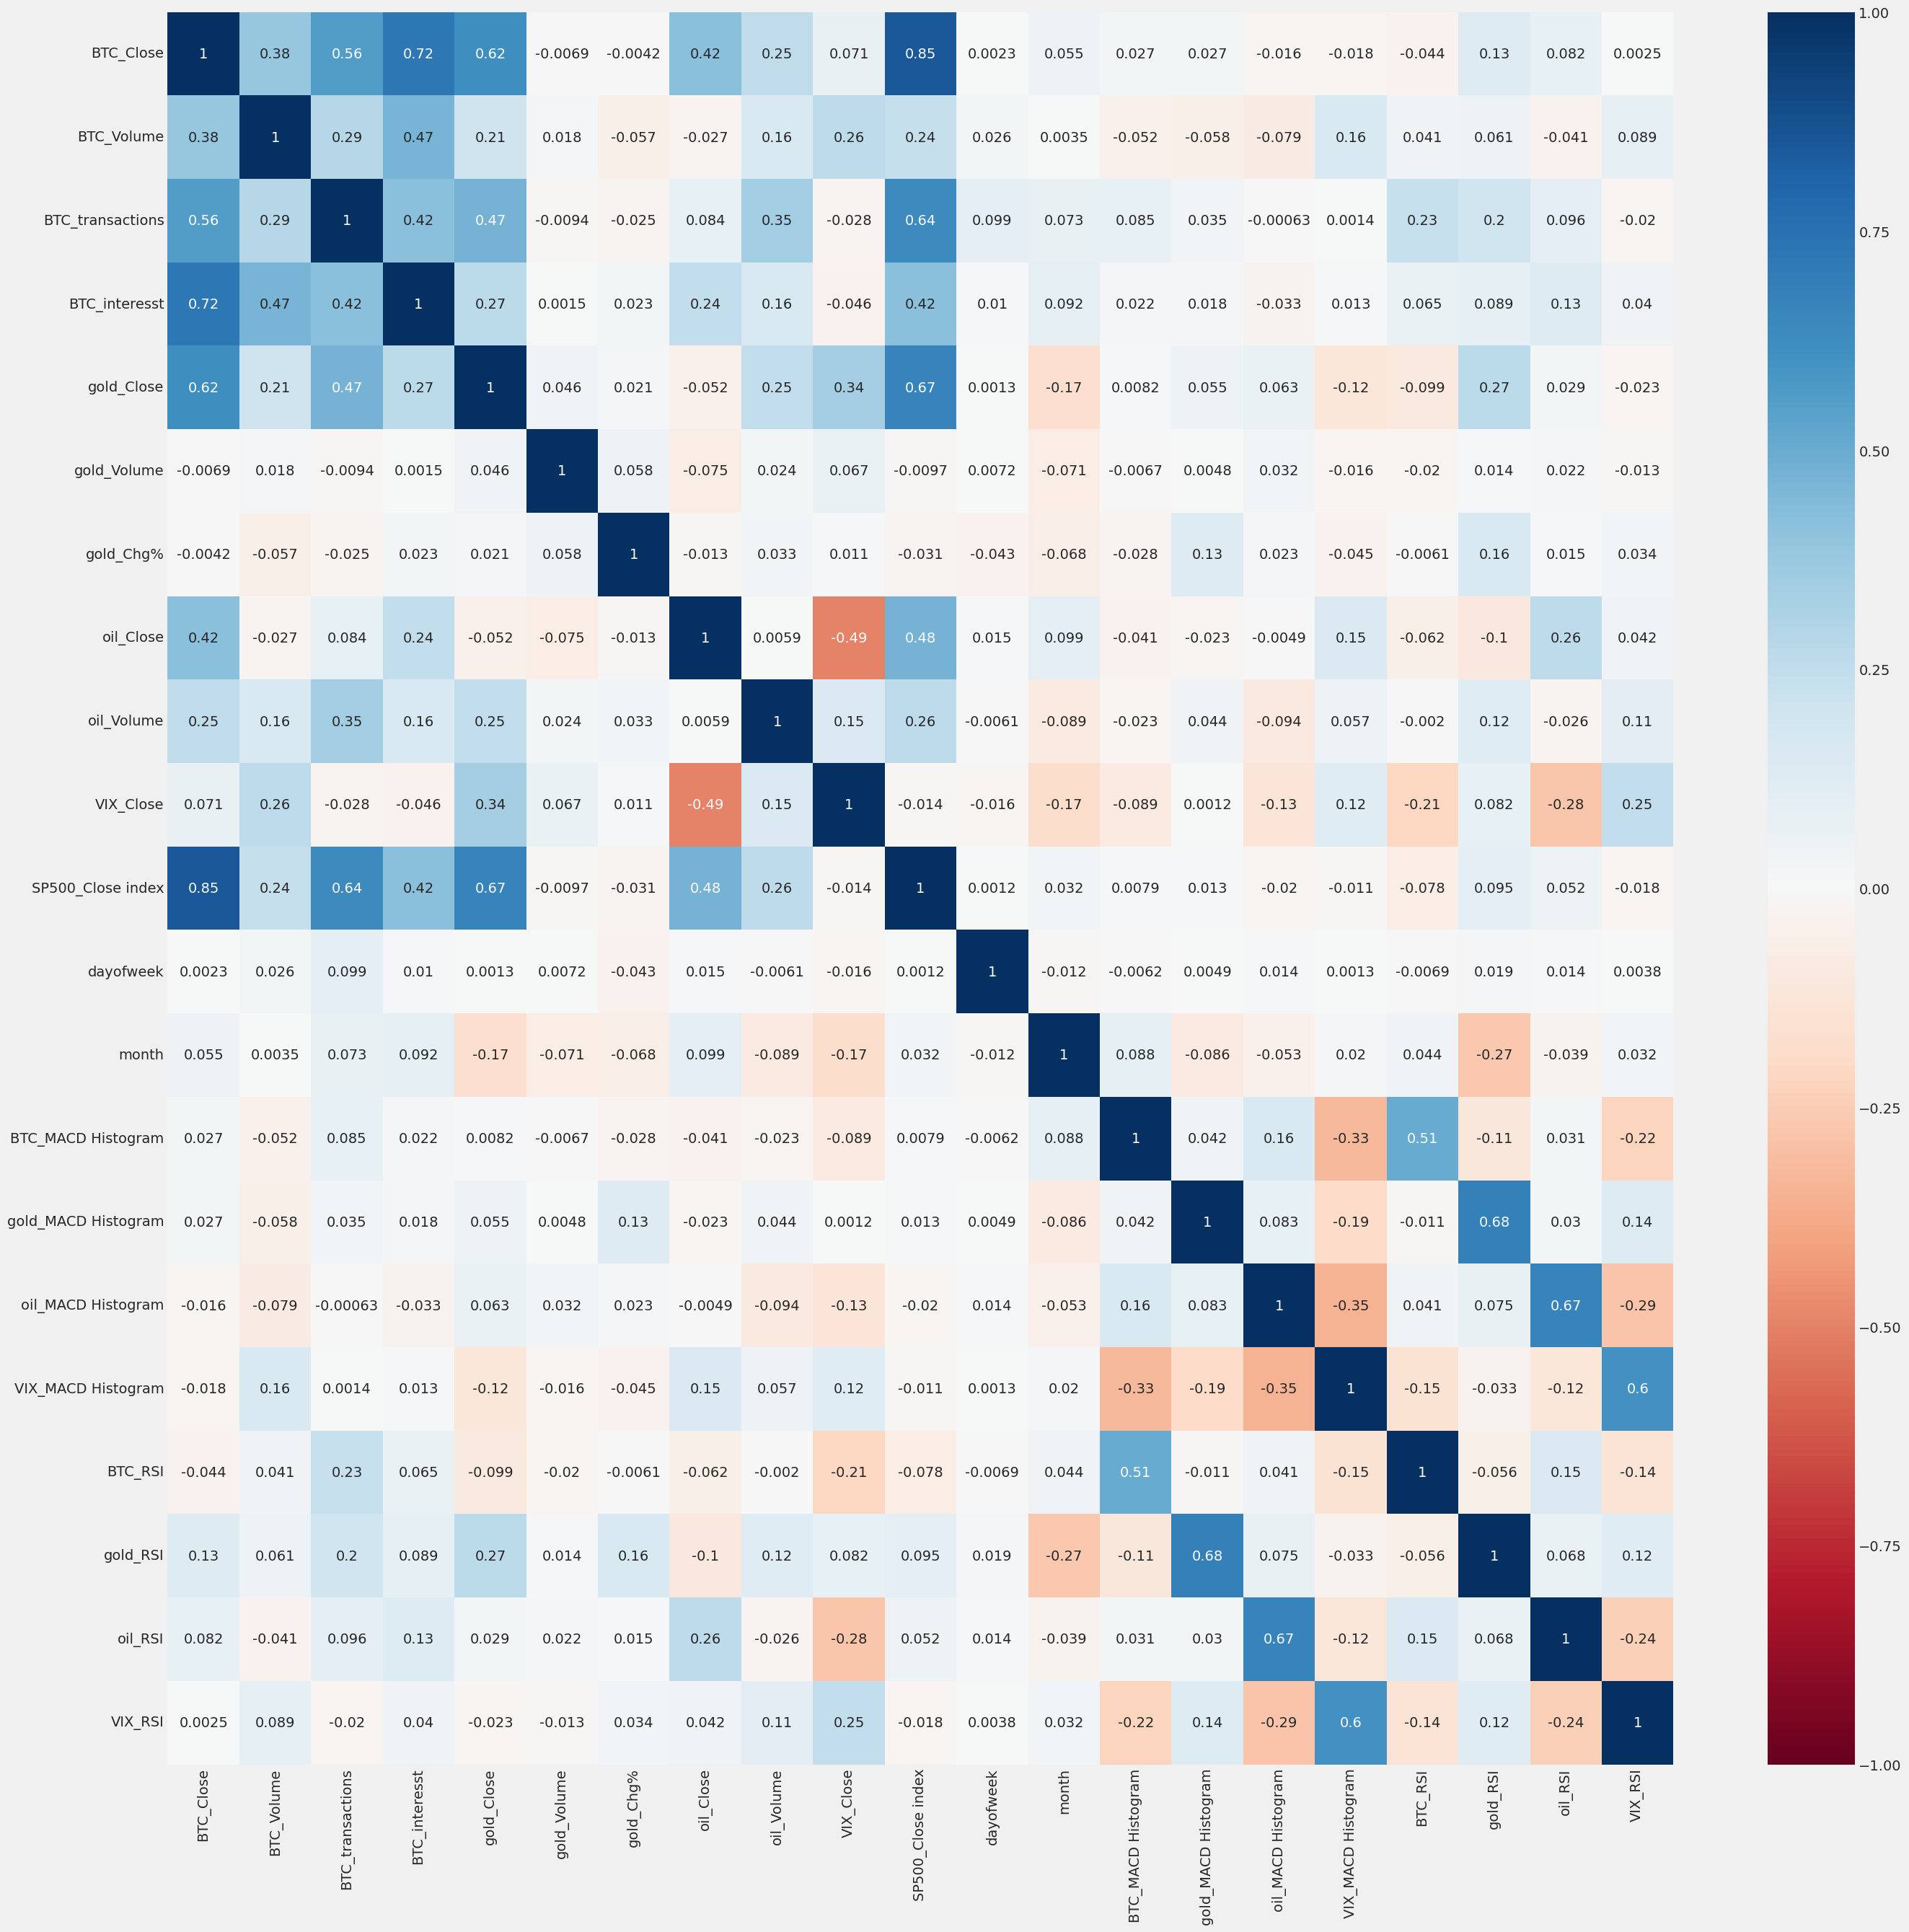

In [16]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)

From the heatmap, we can see that 'Gold Change', 'Gold Volume' have very low correlation to any other variables

# Feature Selection

In [17]:
df= df.drop(['gold_Volume', 'gold_Chg%'], axis=1)
df= df.drop(['dayofweek'], axis=1)

In [29]:
target_features={}
target_features["BTC_Close"]= ['BTC_Close', 'BTC_Volume', 'BTC_transactions', 'BTC_interesst', 'gold_Close', 'oil_Close', 'oil_Volume', 'SP500_Close index', 'gold_RSI']
target_features["oil_Close"]=['BTC_Close', 'BTC_interesst', 'oil_Close', 'VIX_Close', 'SP500_Close index', 'VIX_MACD Histogram', 'oil_RSI', 'gold_RSI']
target_features["gold_Close"]=['BTC_Close', 'BTC_Volume', 'BTC_transactions', 'BTC_interesst', 'gold_Close', 'oil_Volume', 'VIX_Close', 'SP500_Close index', 'month', 'VIX_MACD Histogram', 'gold_RSI']
target_features["VIX_Close"]=['BTC_Volume', 'gold_Close', 'oil_Close', 'oil_Volume', 'VIX_Close', 'month', 'oil_MACD Histogram', 'VIX_MACD Histogram', 'BTC_RSI', 'oil_RSI', 'VIX_RSI', 'gold_RSI']
target_features["SP500_Close index"]=['BTC_Close', 'BTC_Volume', 'BTC_transactions', 'BTC_interesst', 'gold_Close', 'oil_Close', 'oil_Volume', 'SP500_Close index']

# Split train and test data

In [19]:
# Split the data into train and test (7:3)
df_train, df_test = train_test_split(df, test_size=0.3, shuffle=False) #shuffle=False ensures data is split chronologically

# BTC_Close Prediction

## Univariate Prediction with LSTM Model

In [20]:
#Only close price of BTC
targets=["BTC_Close"]
target_result={}
target_history={}
target_rmse={}
window_size=60
batch_size=32
epochs=30
pca=False
for target in targets:
  #df_train, df_test, target, features, pca, window_size, batch_size, epochs
  target_result[target], target_history[target], target_rmse[target] = train_test_model(df_train, df_test, target, [target], pca, window_size, batch_size, epochs) 
all_result['Univariate'] = target_result
all_history['Univariate']=target_history
all_rmse['Univariate']=target_rmse

Epoch 1/30
28/28 [==============================] - 18s 175ms/step - loss: 0.0067 - val_loss: 0.0020
Epoch 2/30
28/28 [==============================] - 4s 152ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 3/30
28/28 [==============================] - 6s 210ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 4/30
28/28 [==============================] - 2s 70ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 5/30
28/28 [==============================] - 2s 67ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 6/30
28/28 [==============================] - 2s 68ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 7/30
28/28 [==============================] - 2s 66ms/step - loss: 9.8604e-04 - val_loss: 0.0011
Epoch 8/30
28/28 [==============================] - 2s 80ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 9/30
28/28 [==============================] - 3s 110ms/step - loss: 9.9987e-04 - val_loss: 0.0015
Epoch 10/30
28/28 [==============================] - 2s 77ms/step - loss: 9.2659e-04 - val_loss:

## Multivariate Prediction

### with PCA

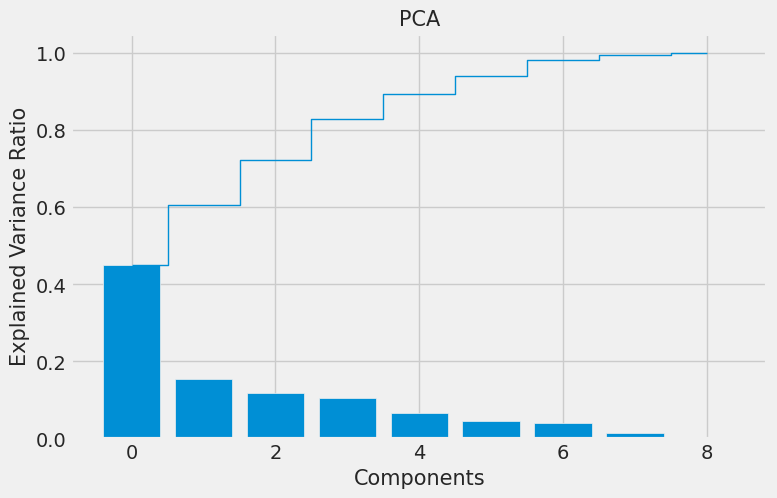

In [21]:
#perform PCA for dimensionality reduction
scaler = StandardScaler().fit(df_train[target_features["BTC_Close"]])
X_1 = scaler.transform(df_train[target_features["BTC_Close"]])
estimator_pca = PCA(n_components=None)
estimator_pca.fit_transform(X_1)
evr = estimator_pca.explained_variance_ratio_ 
cumsum_ev = np.cumsum(evr)
plt.figure(figsize=(8, 5))

plt.bar(range(len(evr)), evr, align='center', label='Component explained variance')
plt.step(range(len(cumsum_ev)), cumsum_ev, where='mid',label='Cumulative explained variance', linewidth=1)

plt.title("PCA", fontsize=15)
plt.xlabel("Components",fontsize=15)
plt.ylabel("Explained Variance Ratio",fontsize=15)
plt.show()
#should pick n=7 or 8?

In [22]:
#PCA of BTC
# targets=["BTC_Close" ,'gold_Close', 'oil_Close','VIX_Close','SP500_Close index']
targets=["BTC_Close"]
feature=target_features["BTC_Close"]
# feature=df.columns
target_result={}
target_history={}
target_rmse={}
window_size=60
batch_size=32
epochs=30
pca=True
for target in targets:
  #df_train, df_test, target, features, pca, window_size, batch_size, epochs
  target_result[target], target_history[target], target_rmse[target] = train_test_model(df_train, df_test, target, feature, pca, window_size, batch_size, epochs) 
all_result['Multivariate_PCA']=target_result
all_history['Multivariate_PCA']=target_history
all_rmse['Multivariate_PCA']=target_rmse

Epoch 1/30
28/28 [==============================] - 8s 116ms/step - loss: 0.0166 - val_loss: 0.0154
Epoch 2/30
28/28 [==============================] - 3s 112ms/step - loss: 0.0022 - val_loss: 0.0207
Epoch 3/30
28/28 [==============================] - 2s 73ms/step - loss: 0.0021 - val_loss: 0.0126
Epoch 4/30
28/28 [==============================] - 2s 68ms/step - loss: 0.0018 - val_loss: 0.0117
Epoch 5/30
28/28 [==============================] - 2s 67ms/step - loss: 0.0016 - val_loss: 0.0134
Epoch 6/30
28/28 [==============================] - 2s 67ms/step - loss: 0.0016 - val_loss: 0.0152
Epoch 7/30
28/28 [==============================] - 2s 67ms/step - loss: 0.0014 - val_loss: 0.0116
Epoch 8/30
28/28 [==============================] - 3s 111ms/step - loss: 0.0011 - val_loss: 0.0093
Epoch 9/30
28/28 [==============================] - 3s 112ms/step - loss: 0.0013 - val_loss: 0.0091
Epoch 10/30
28/28 [==============================] - 2s 70ms/step - loss: 0.0011 - val_loss: 0.0076
Epoch

As seen from plotting the prediction values against the actual values, the multivariate prediction is not performing too well towards the end.

### without PCA

In [23]:
#Multivariate of BTC
targets=["BTC_Close"]
feature=target_features["BTC_Close"]
target_result={}
target_history={}
target_rmse={}
window_size=60
batch_size=32
epochs=30
pca=False
for target in targets:
  #df_train, df_test, target, features, pca, window_size, batch_size, epochs
  target_result[target], target_history[target], target_rmse[target] = train_test_model(df_train, df_test, target, feature, pca, window_size, batch_size, epochs) 
all_result['Multivariate']=target_result
all_history['Multivariate']=target_history
all_rmse['Multivariate']=target_rmse


Epoch 1/30
28/28 [==============================] - 7s 114ms/step - loss: 0.0088 - val_loss: 0.0144
Epoch 2/30
28/28 [==============================] - 3s 110ms/step - loss: 0.0017 - val_loss: 0.0191
Epoch 3/30
28/28 [==============================] - 2s 71ms/step - loss: 0.0014 - val_loss: 0.0104
Epoch 4/30
28/28 [==============================] - 2s 73ms/step - loss: 0.0012 - val_loss: 0.0120
Epoch 5/30
28/28 [==============================] - 3s 112ms/step - loss: 0.0012 - val_loss: 0.0062
Epoch 6/30
28/28 [==============================] - 2s 85ms/step - loss: 9.1685e-04 - val_loss: 0.0090
Epoch 7/30
28/28 [==============================] - 3s 99ms/step - loss: 8.6753e-04 - val_loss: 0.0057
Epoch 8/30
28/28 [==============================] - 3s 102ms/step - loss: 7.7352e-04 - val_loss: 0.0075
Epoch 9/30
28/28 [==============================] - 2s 67ms/step - loss: 8.4149e-04 - val_loss: 0.0078
Epoch 10/30
28/28 [==============================] - 2s 67ms/step - loss: 7.5663e-04 - va

## Results

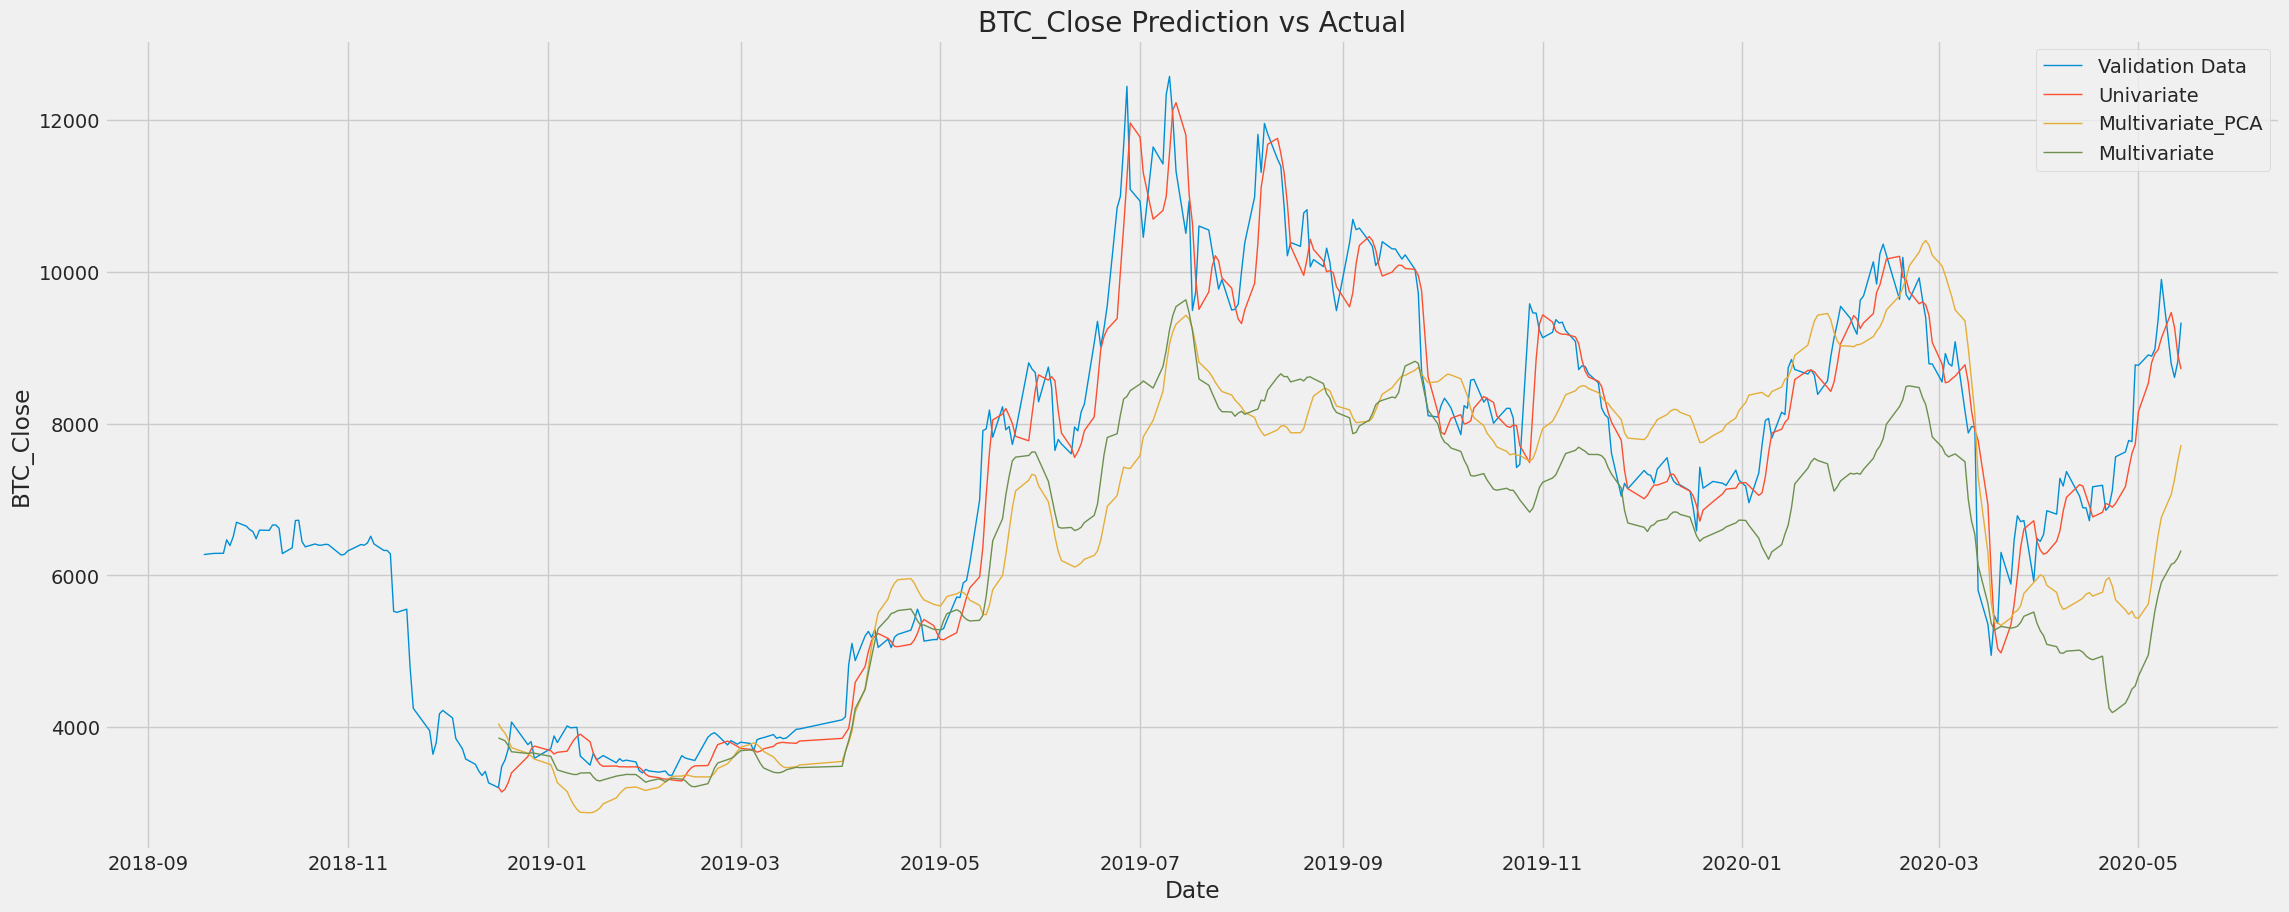

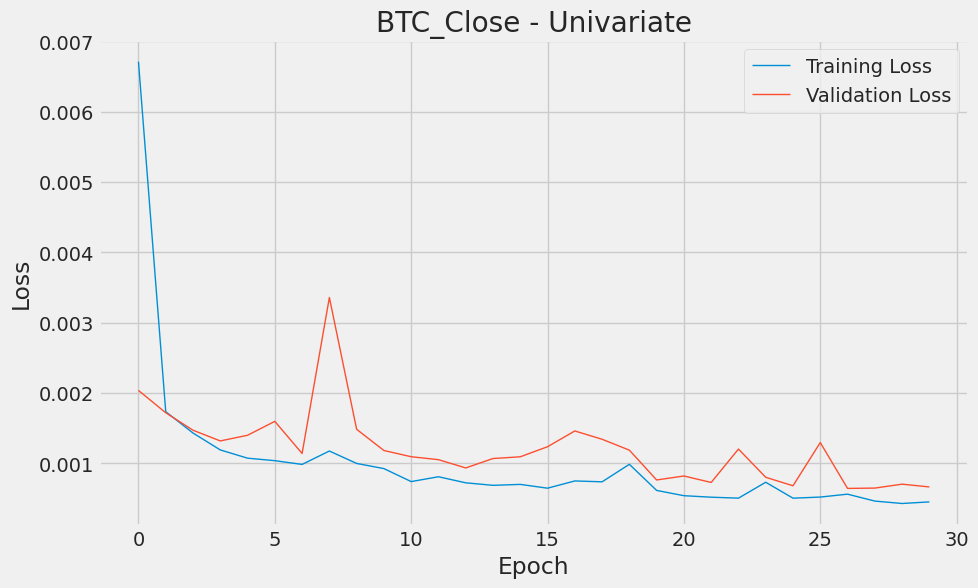

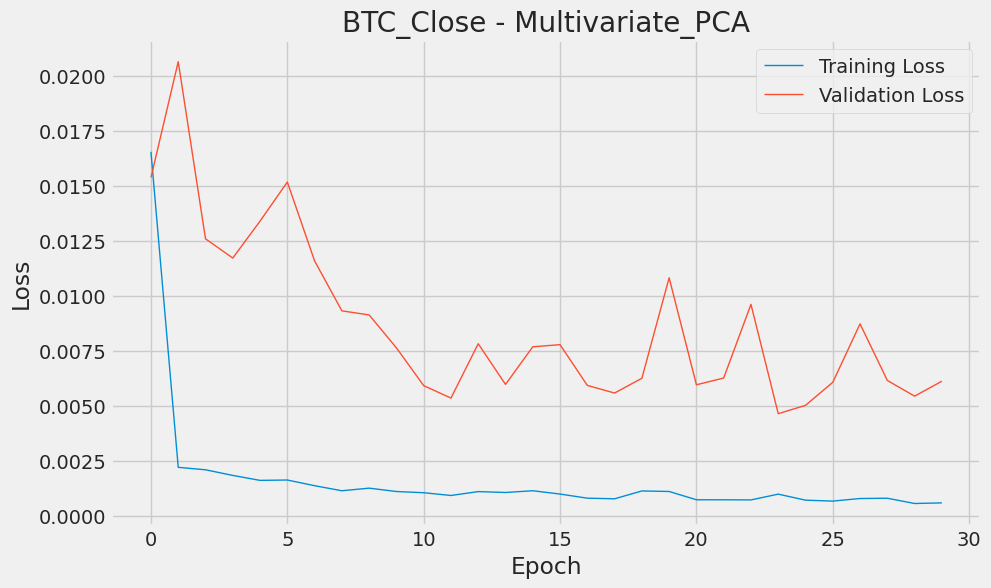

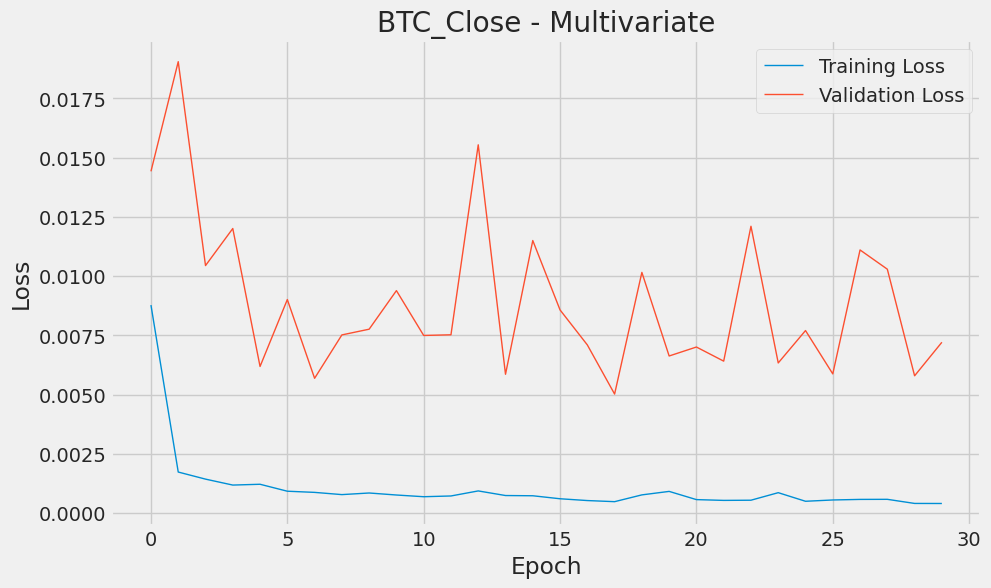

In [24]:
plot_prediction(all_result,df_test,targets)
plot_history(all_history,targets)

In [25]:
pd.DataFrame(all_rmse)

Univariate  Multivariate_PCA  Multivariate
BTC_Close  484.861011       1470.522915   1595.084022

## Repeat using ARIMA

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.6 MB/s eta 0:00:00


In [ ]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from pmdarima.arima import auto_arima

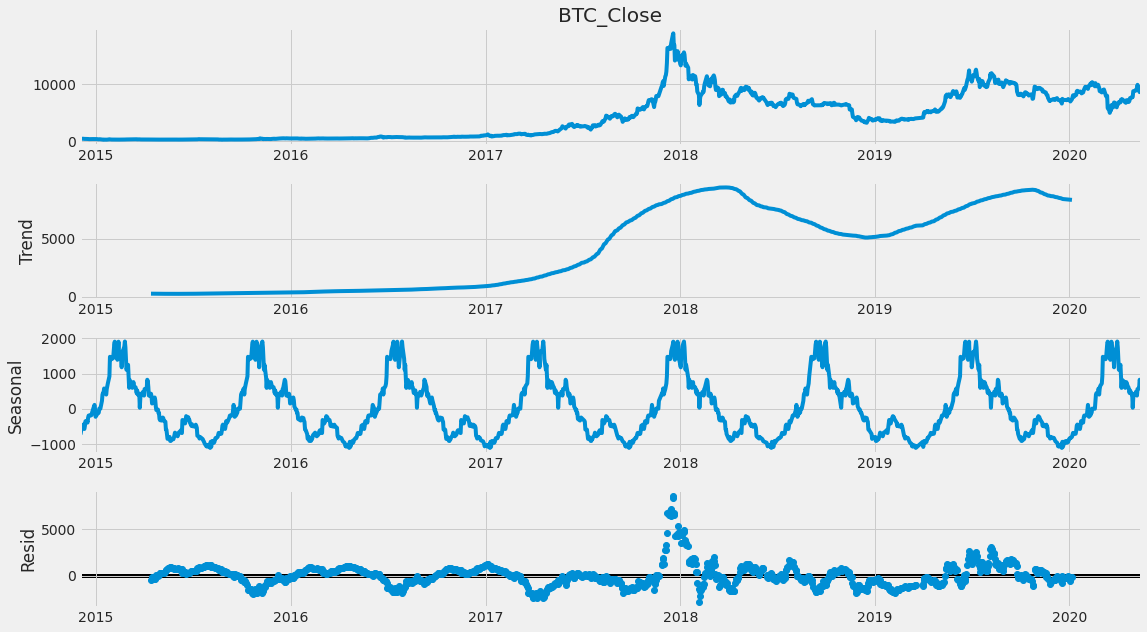

In [ ]:
result = sm.tsa.seasonal_decompose(df['BTC_Close'], model='additive', period=180) #'additive'
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

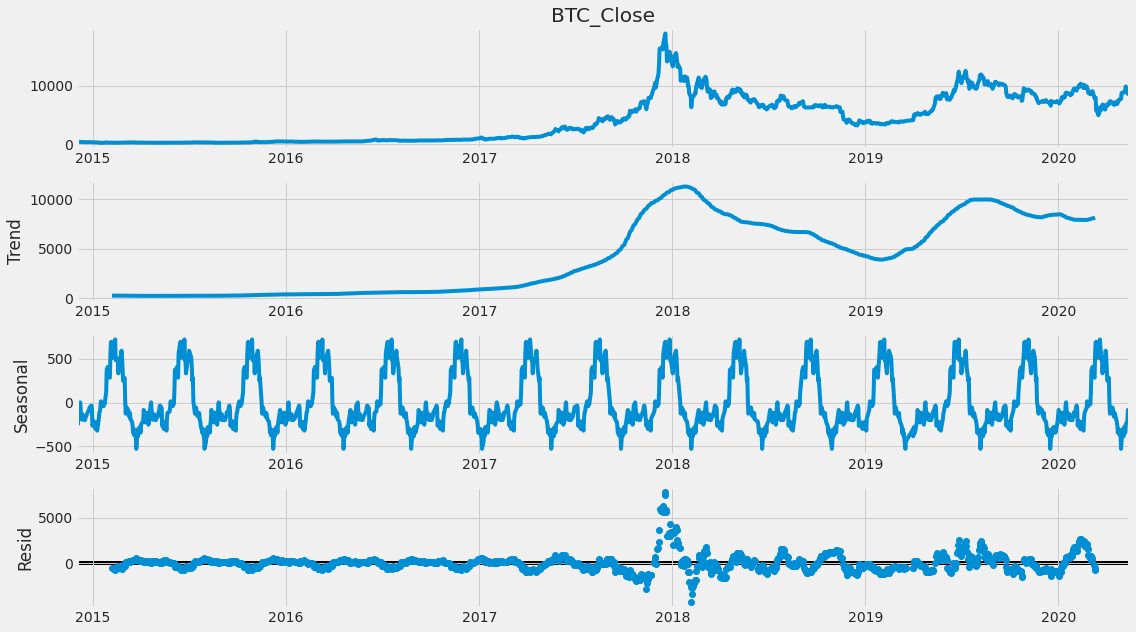

In [ ]:
result = sm.tsa.seasonal_decompose(df['BTC_Close'], model='additive', period=90) #'additive'
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

RMSE: 
ARIMA - 363.14318476249

# Repeat with BTC, Gold, Oil, VIX and SP500 index

## Univariate with BTC, Gold, Oil, VIX and SP500 index

In [26]:
all_result={}
all_history={}
all_rmse={}

In [27]:
#Only close price of BTC/GOLD/OIL/VIX/SP500
targets=["BTC_Close" ,'gold_Close', 'oil_Close','VIX_Close','SP500_Close index']
target_result={}
target_history={}
target_rmse={}
window_size=60
batch_size=32
epochs=30
pca=False
for target in targets:
  #df_train, df_test, target, features, pca, window_size, batch_size, epochs
  target_result[target], target_history[target], target_rmse[target] = train_test_model(df_train, df_test, target, [target], pca, window_size, batch_size, epochs) 
all_result['Univariate'] = target_result
all_history['Univariate']=target_history
all_rmse['Univariate']=target_rmse

Epoch 1/30
28/28 [==============================] - 10s 192ms/step - loss: 0.0093 - val_loss: 0.0032
Epoch 2/30
28/28 [==============================] - 6s 221ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 3/30
28/28 [==============================] - 5s 171ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4/30
28/28 [==============================] - 5s 180ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/30
28/28 [==============================] - 4s 155ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 6/30
28/28 [==============================] - 6s 216ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 7/30
28/28 [==============================] - 5s 165ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 8/30
28/28 [==============================] - 4s 134ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 9/30
28/28 [==============================] - 5s 178ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 10/30
28/28 [==============================] - 4s 142ms/step - loss: 9.8726e-04 - val_loss: 0

## Multivariate with BTC, Gold, Oil, VIX and SP500 index

In [30]:
#PCA of BTC/GOLD/OIL/VIX/SP500
targets=["BTC_Close" ,'gold_Close', 'oil_Close','VIX_Close','SP500_Close index']
target_result={}
target_history={}
target_rmse={}
window_size=60
batch_size=32
epochs=30
pca=True
for target in targets:
  feature=target_features[target]
  #df_train, df_test, target, features, pca, window_size, batch_size, epochs
  target_result[target], target_history[target], target_rmse[target] = train_test_model(df_train, df_test, target, feature, pca, window_size, batch_size, epochs) 
all_result['Multivariate_PCA']=target_result
all_history['Multivariate_PCA']=target_history
all_rmse['Multivariate_PCA']=target_rmse

Epoch 1/30
28/28 [==============================] - 7s 98ms/step - loss: 0.0178 - val_loss: 0.0052
Epoch 2/30
28/28 [==============================] - 2s 86ms/step - loss: 0.0026 - val_loss: 0.0151
Epoch 3/30
28/28 [==============================] - 3s 112ms/step - loss: 0.0019 - val_loss: 0.0109
Epoch 4/30
28/28 [==============================] - 2s 67ms/step - loss: 0.0016 - val_loss: 0.0132
Epoch 5/30
28/28 [==============================] - 2s 67ms/step - loss: 0.0016 - val_loss: 0.0070
Epoch 6/30
28/28 [==============================] - 2s 70ms/step - loss: 0.0014 - val_loss: 0.0089
Epoch 7/30
28/28 [==============================] - 2s 67ms/step - loss: 0.0013 - val_loss: 0.0068
Epoch 8/30
28/28 [==============================] - 2s 67ms/step - loss: 0.0012 - val_loss: 0.0106
Epoch 9/30
28/28 [==============================] - 3s 96ms/step - loss: 0.0015 - val_loss: 0.0065
Epoch 10/30
28/28 [==============================] - 3s 106ms/step - loss: 0.0011 - val_loss: 0.0081
Epoch 1

## Results

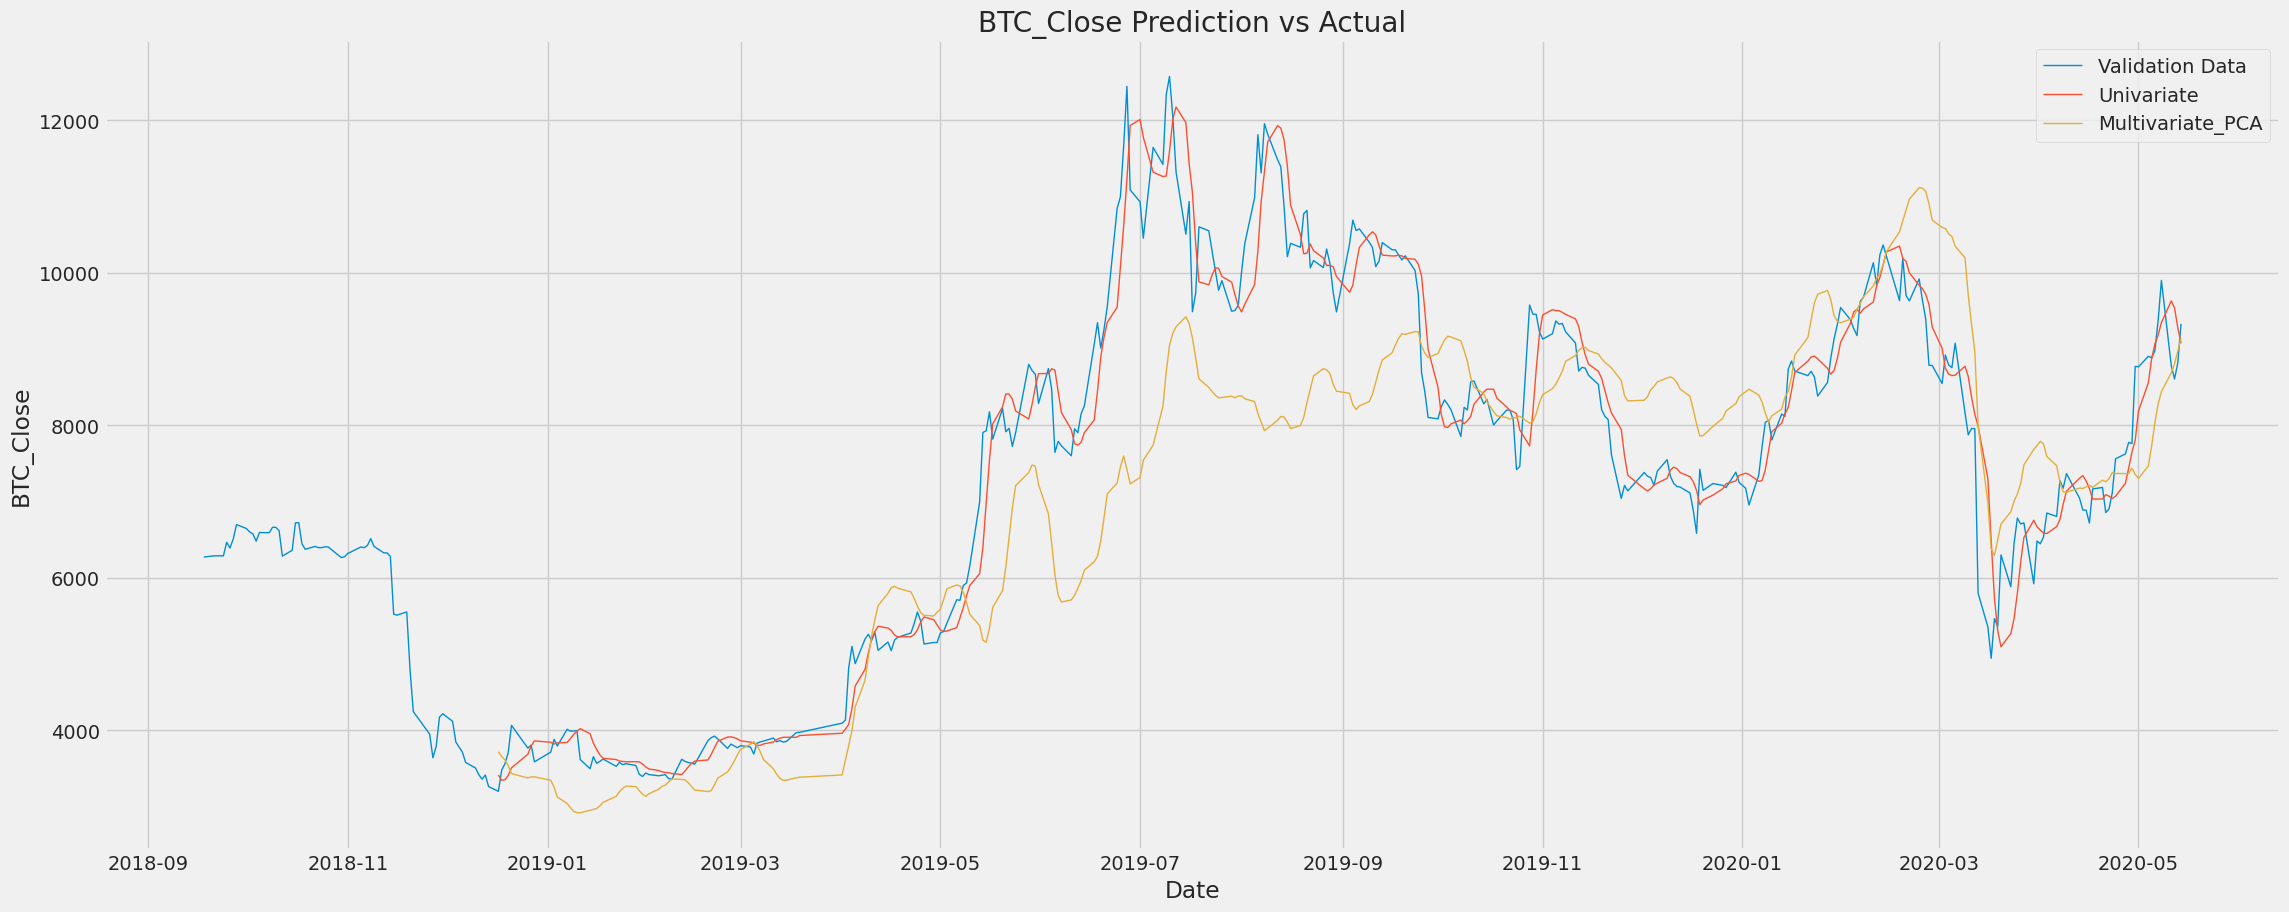

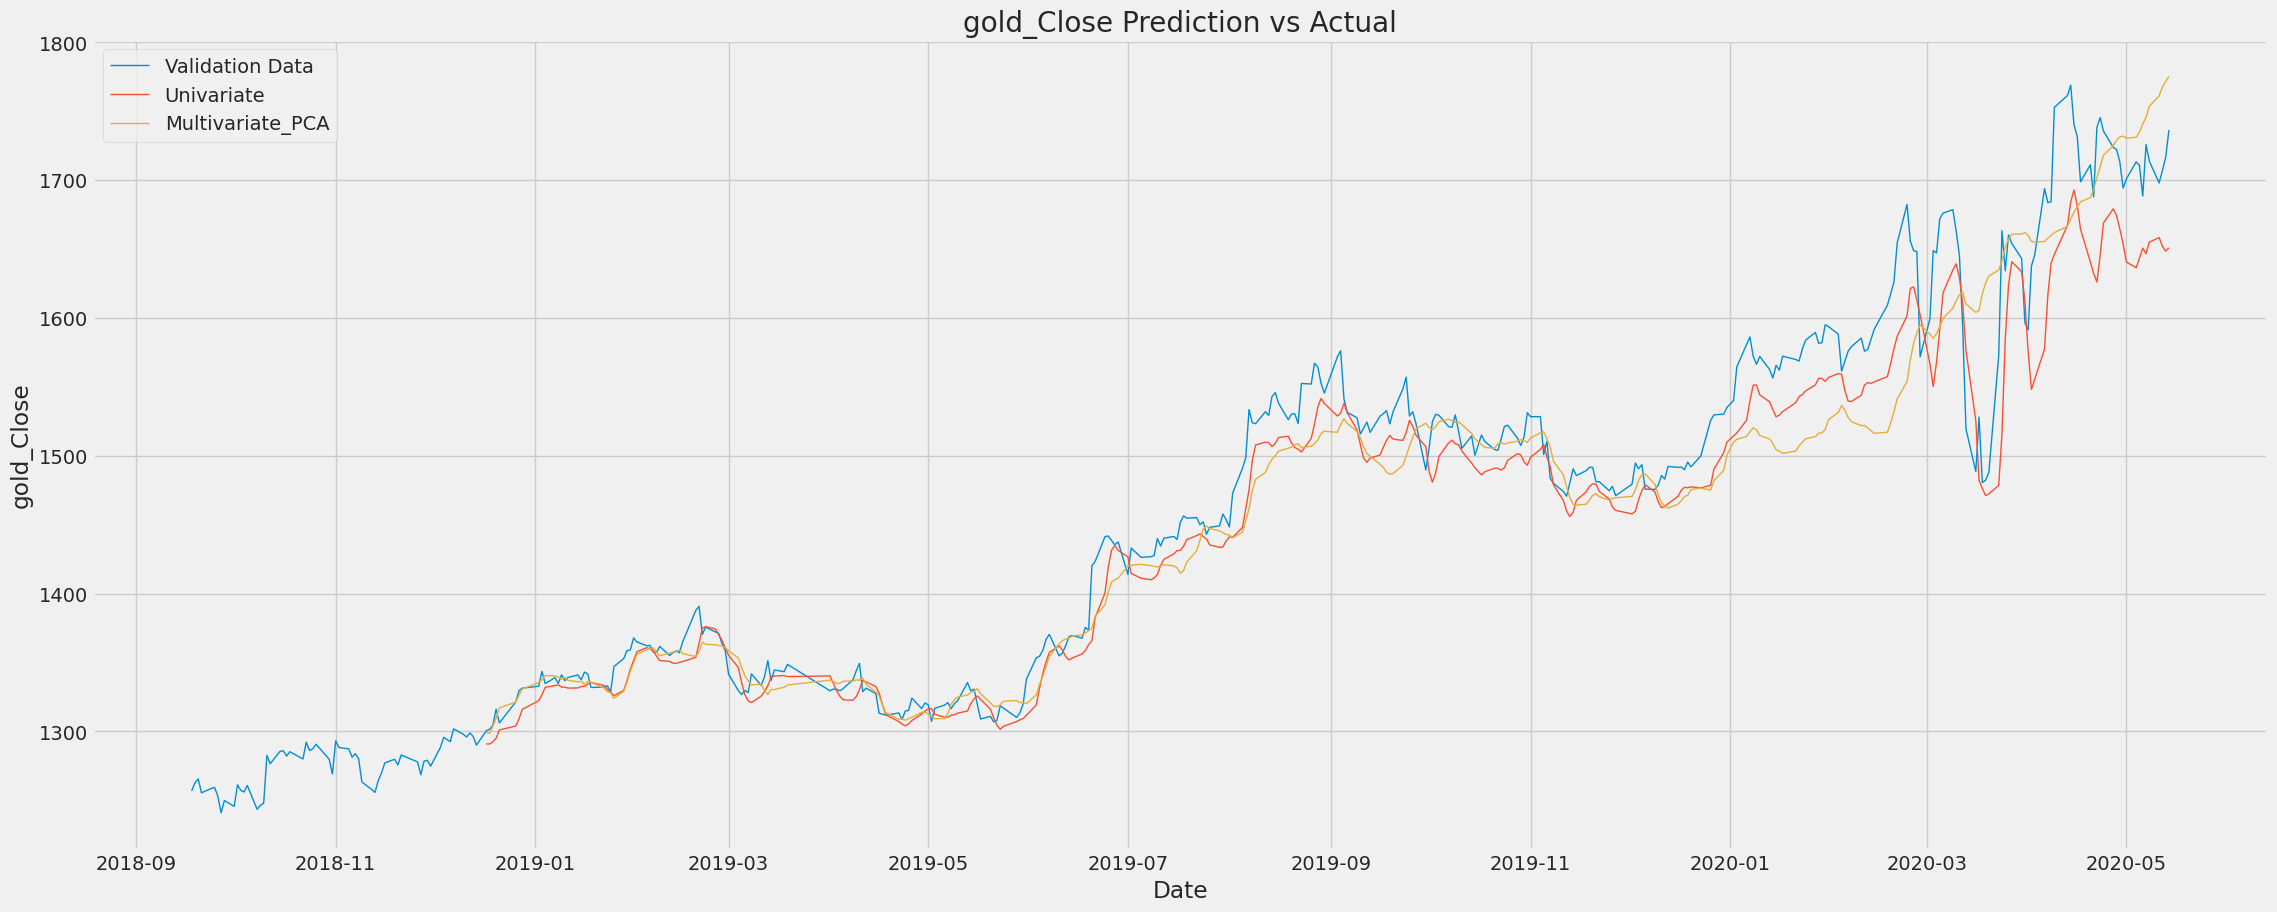

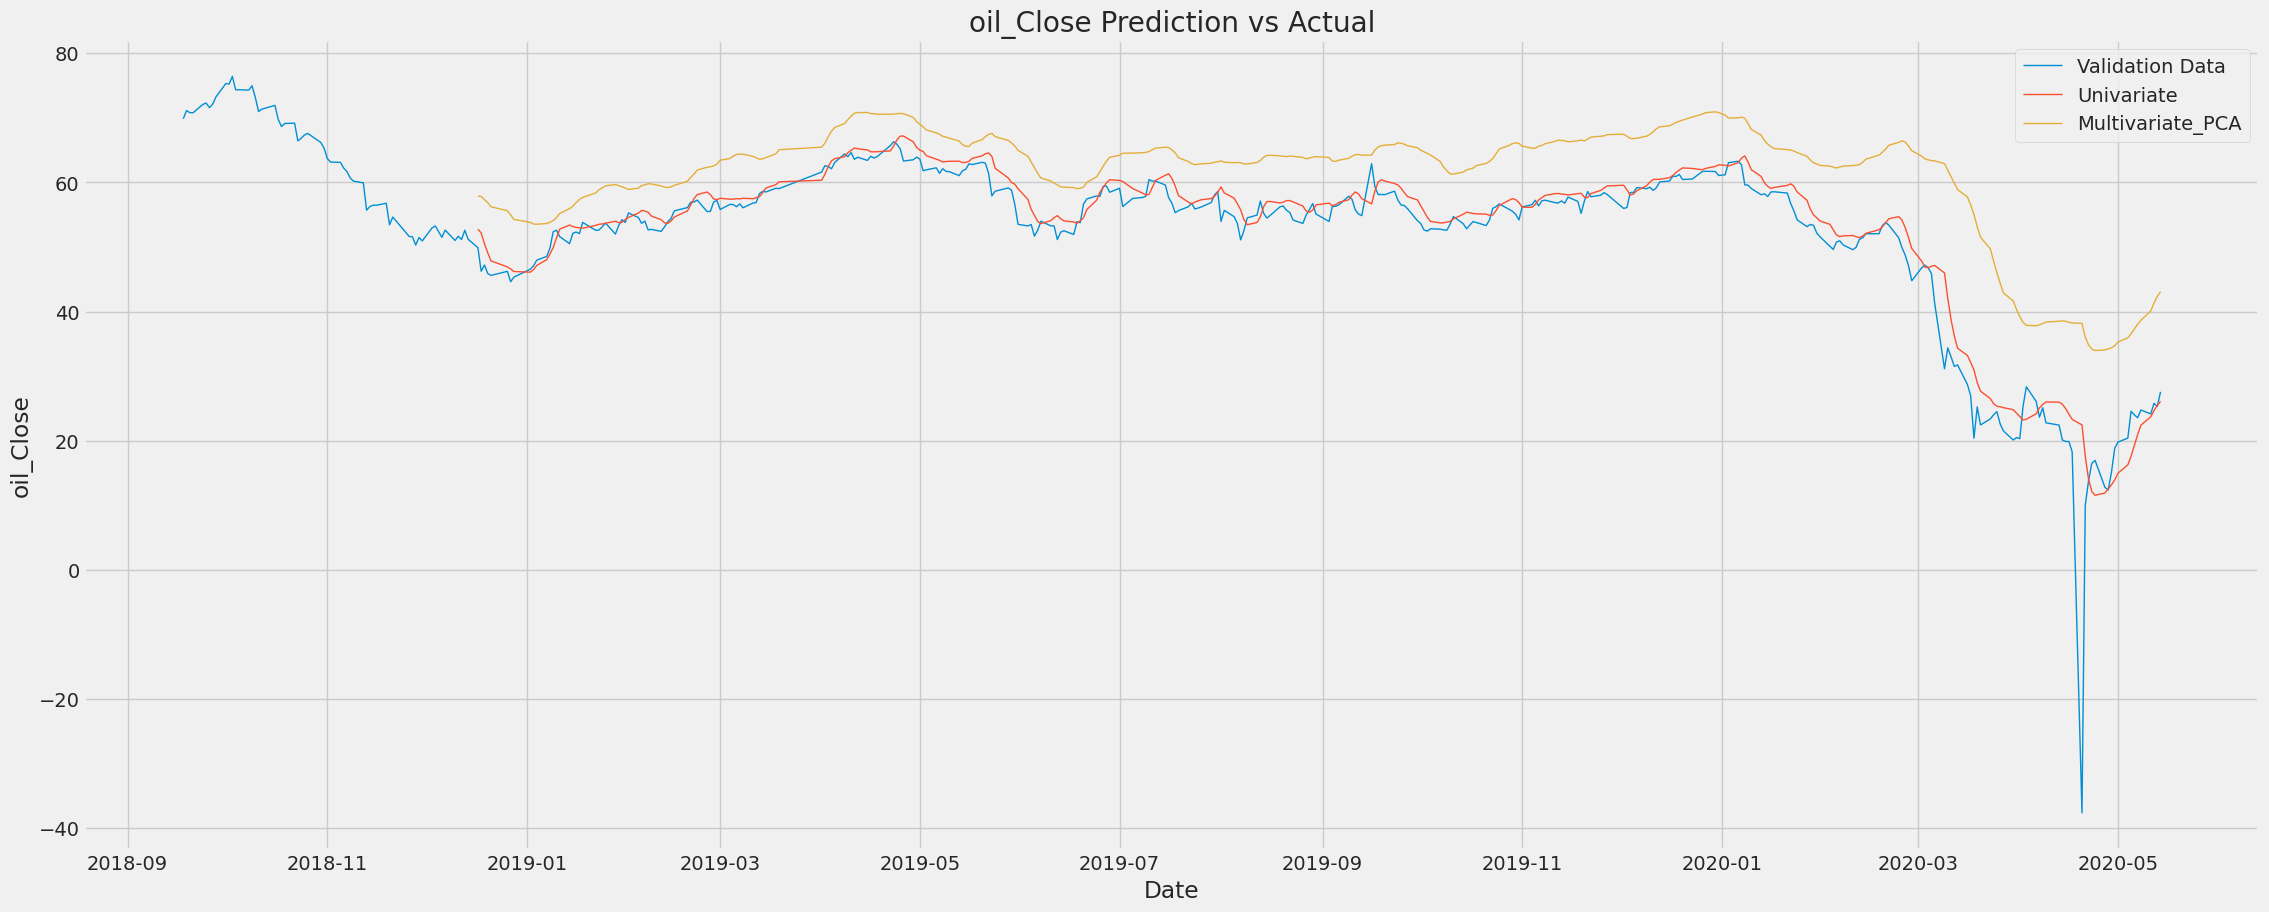

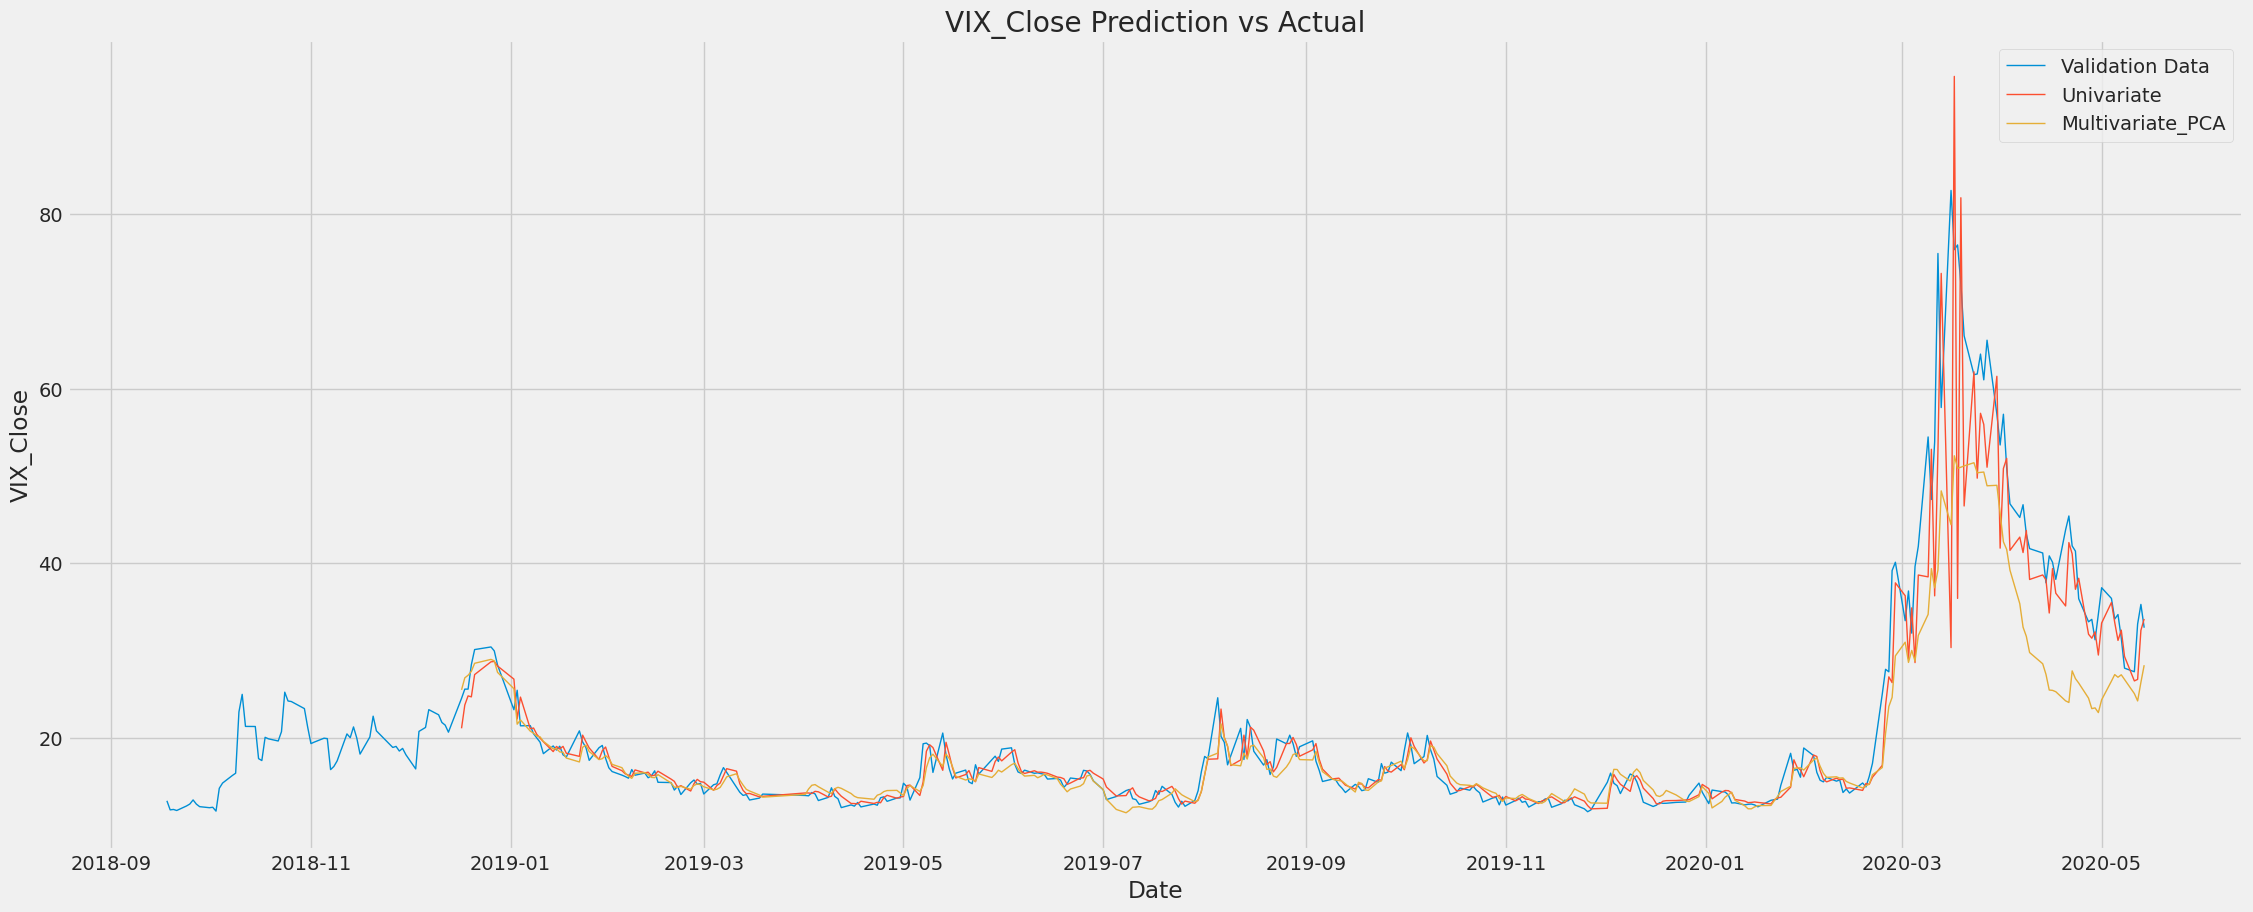

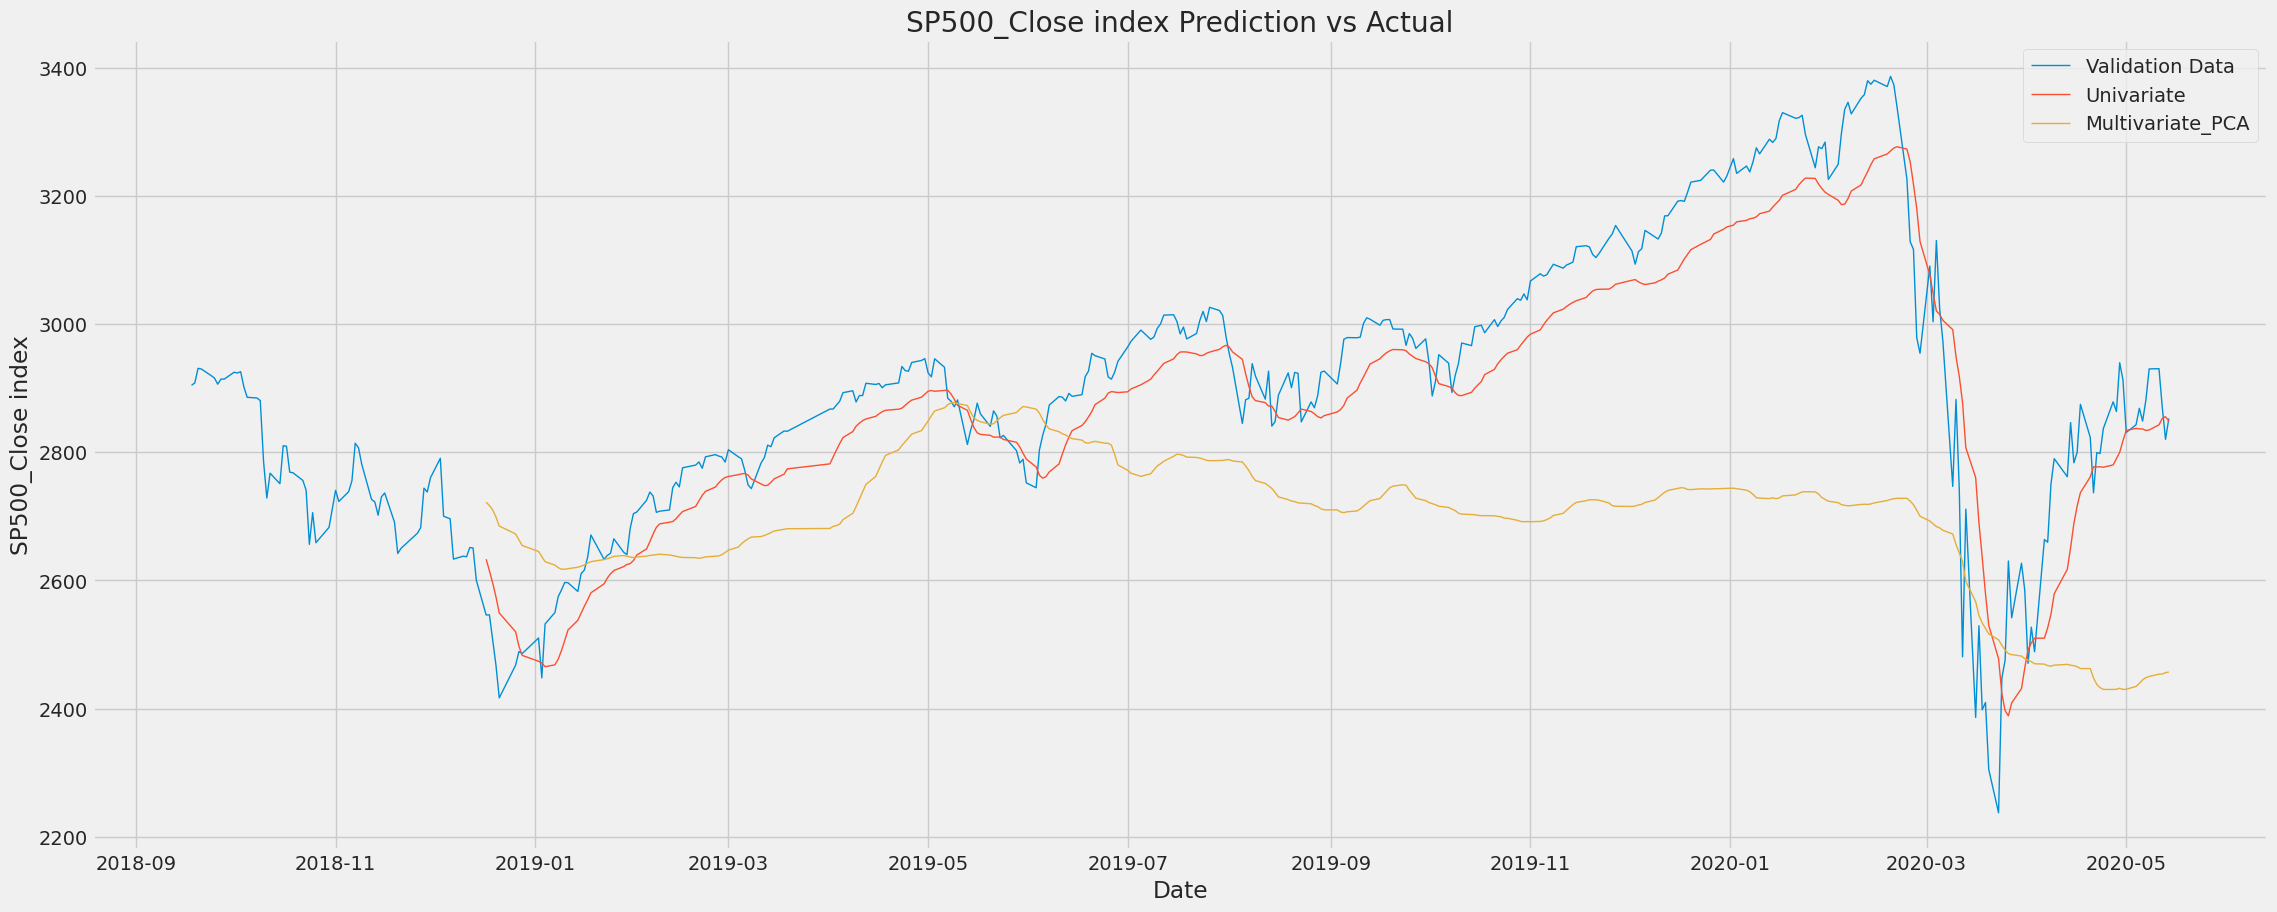

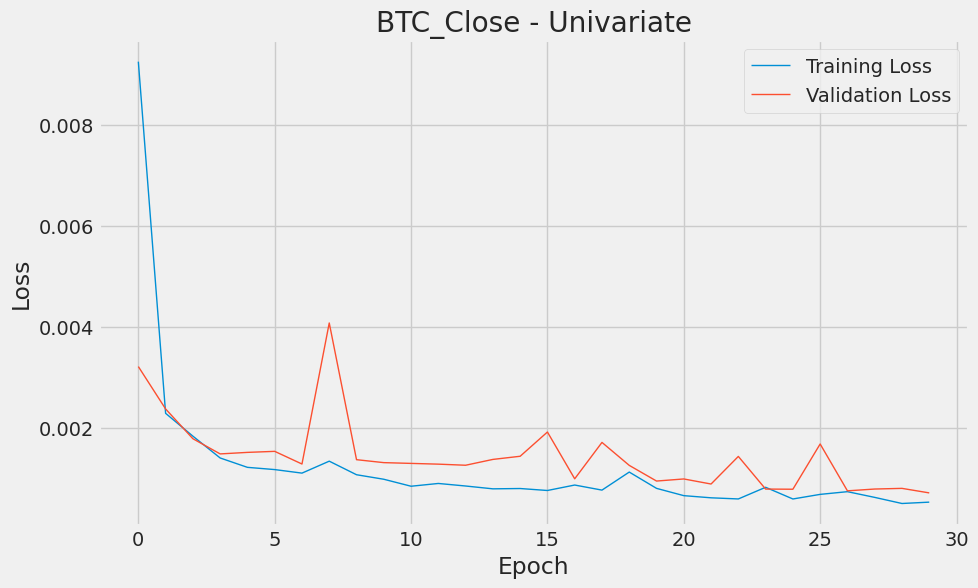

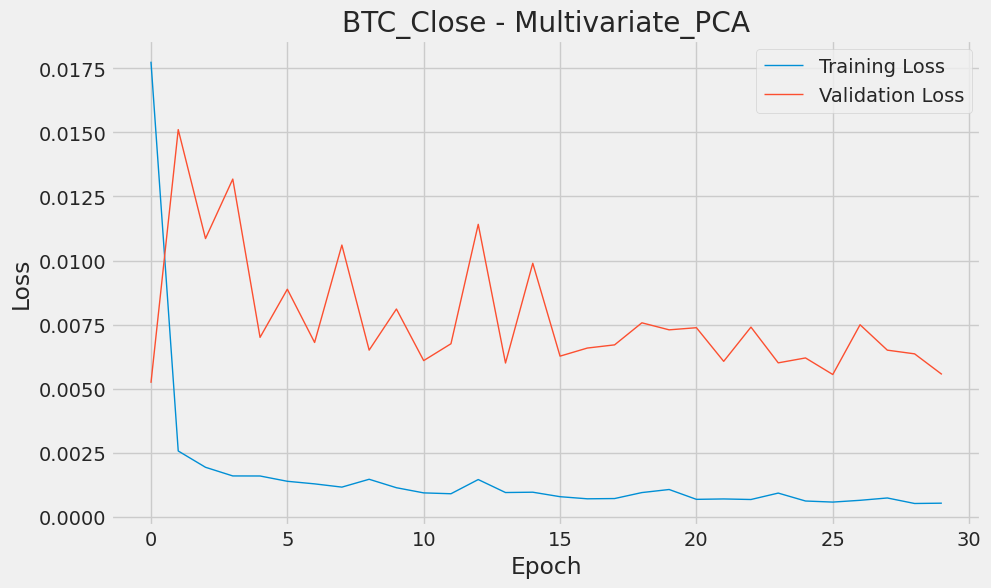

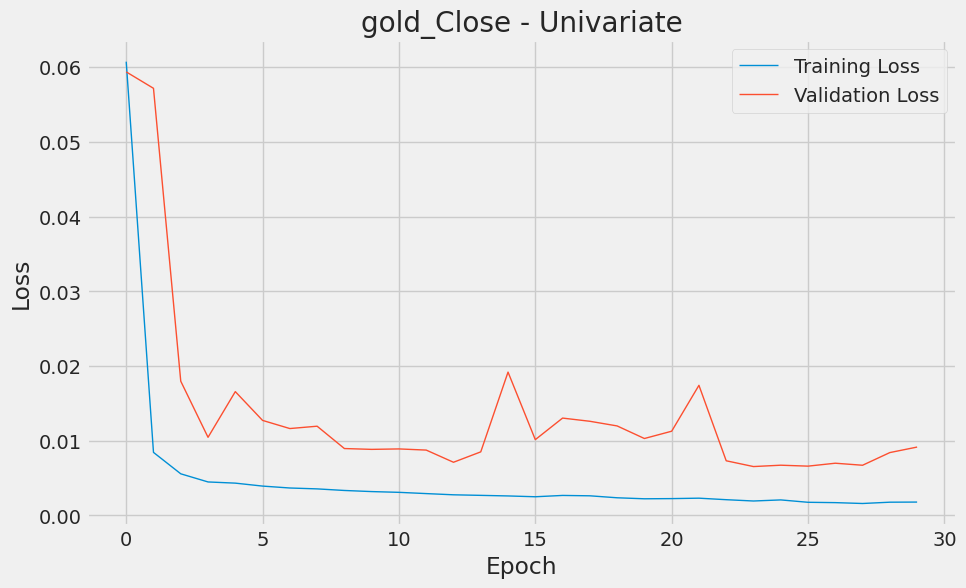

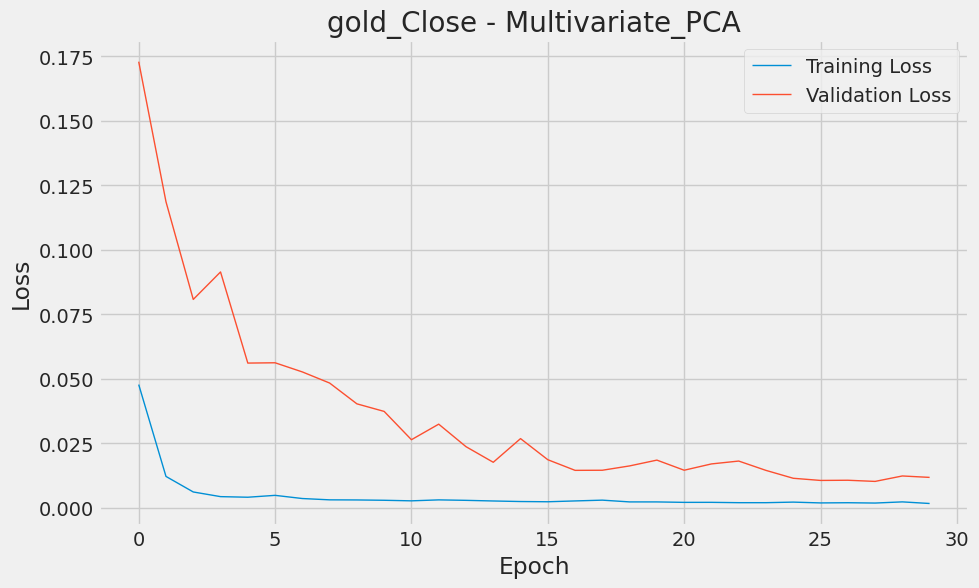

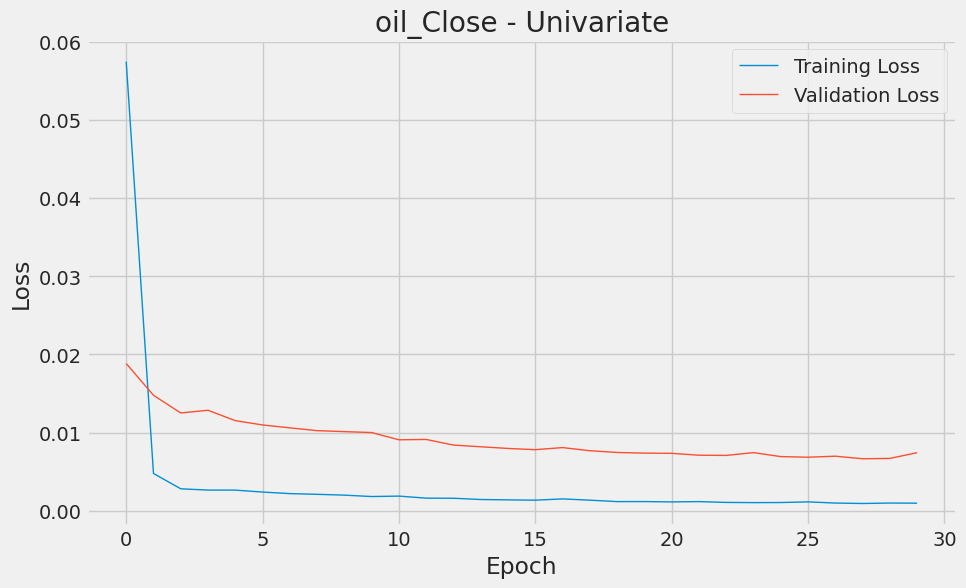

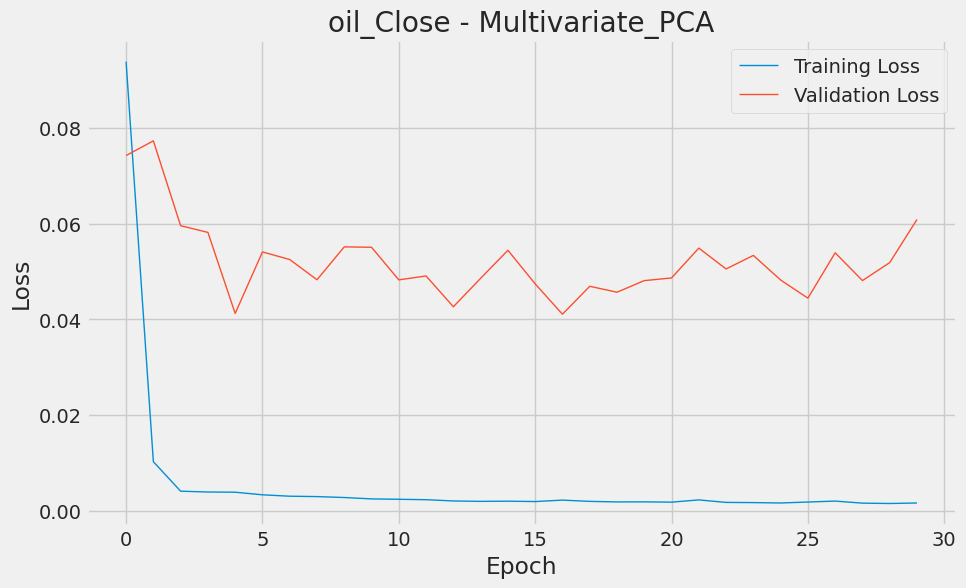

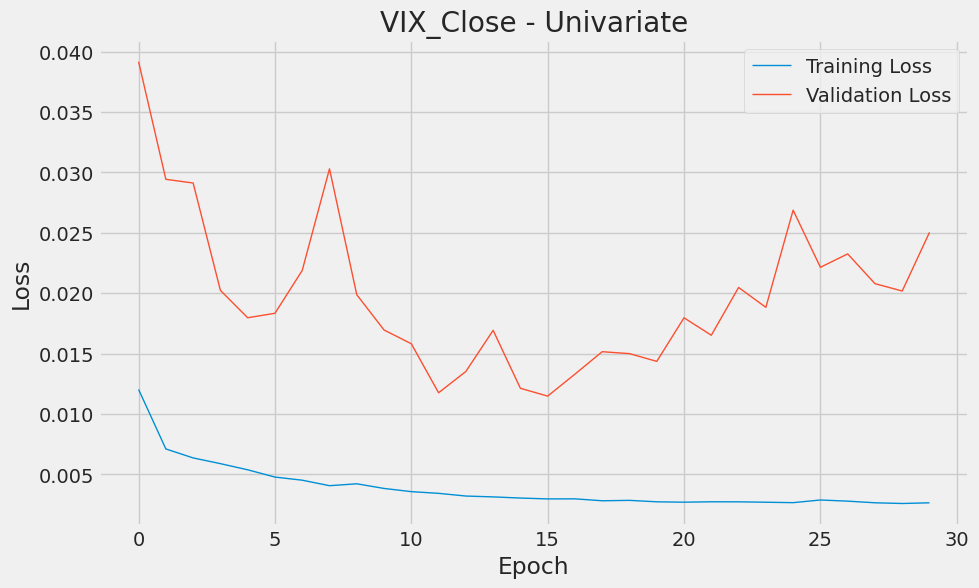

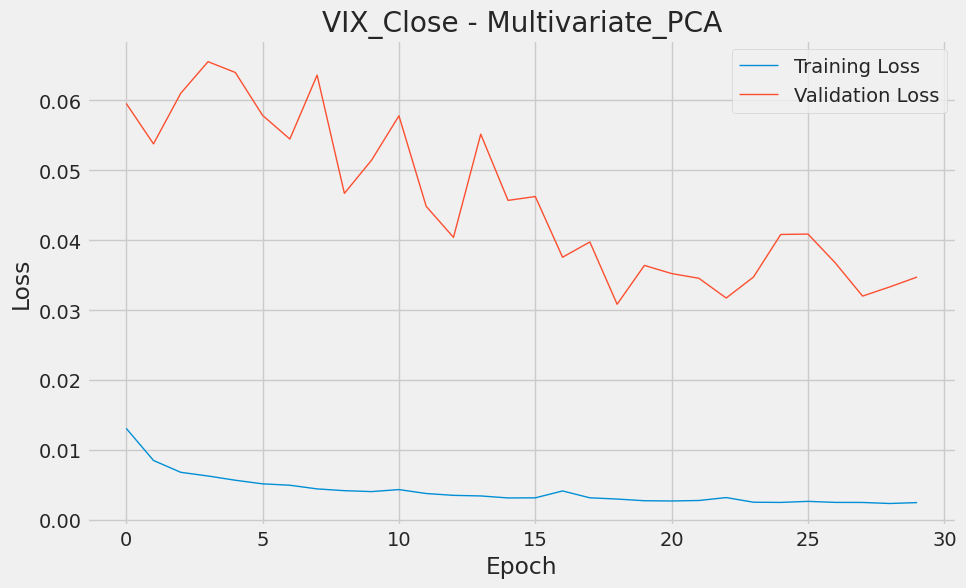

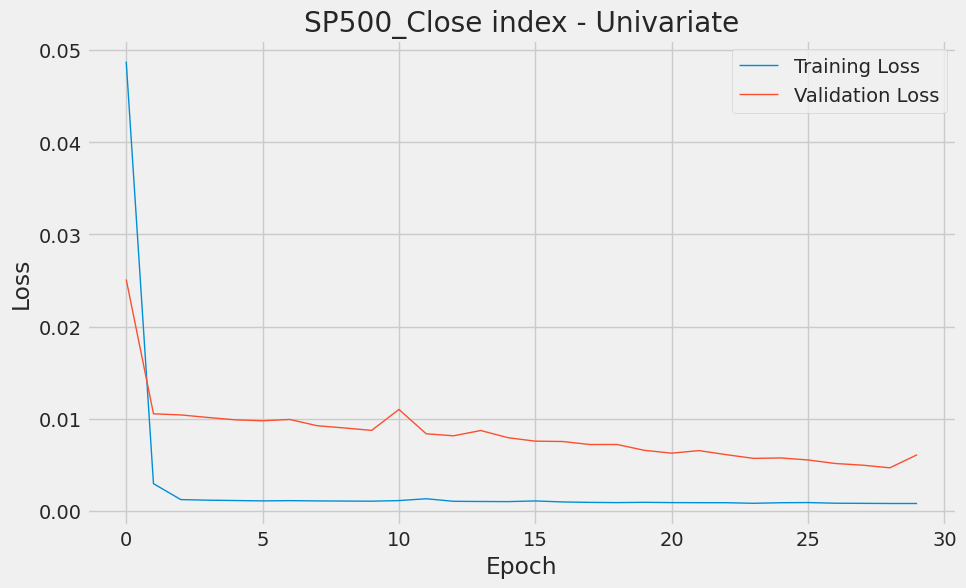

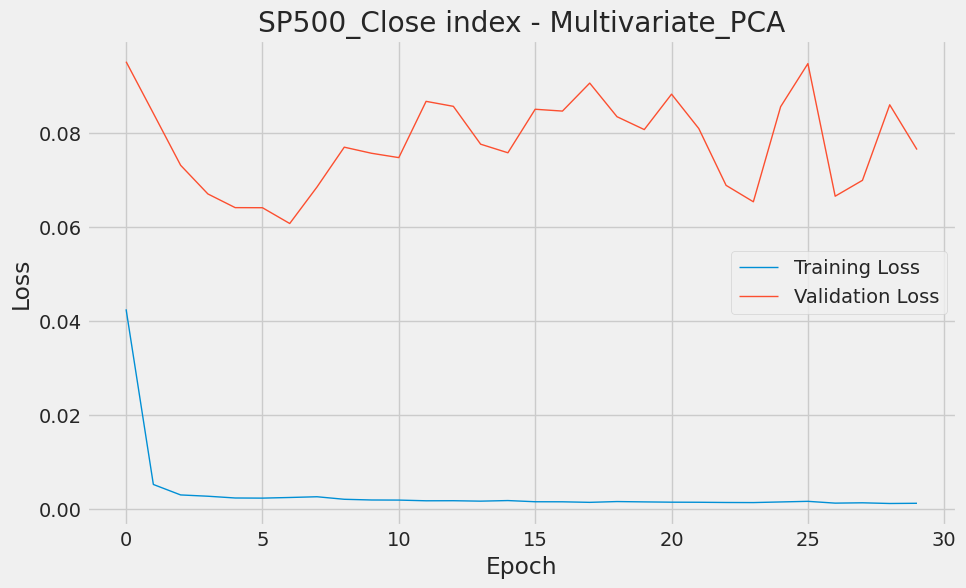

In [31]:
plot_prediction(all_result,df_test,targets)
plot_history(all_history,targets)

In [33]:
pd.DataFrame(all_rmse)

Univariate  Multivariate_PCA
BTC_Close          503.190007       1400.365018
gold_Close          33.128207         37.697721
oil_Close            4.131455         11.827524
VIX_Close            4.999998          5.890400
SP500_Close index   84.814091        299.850368

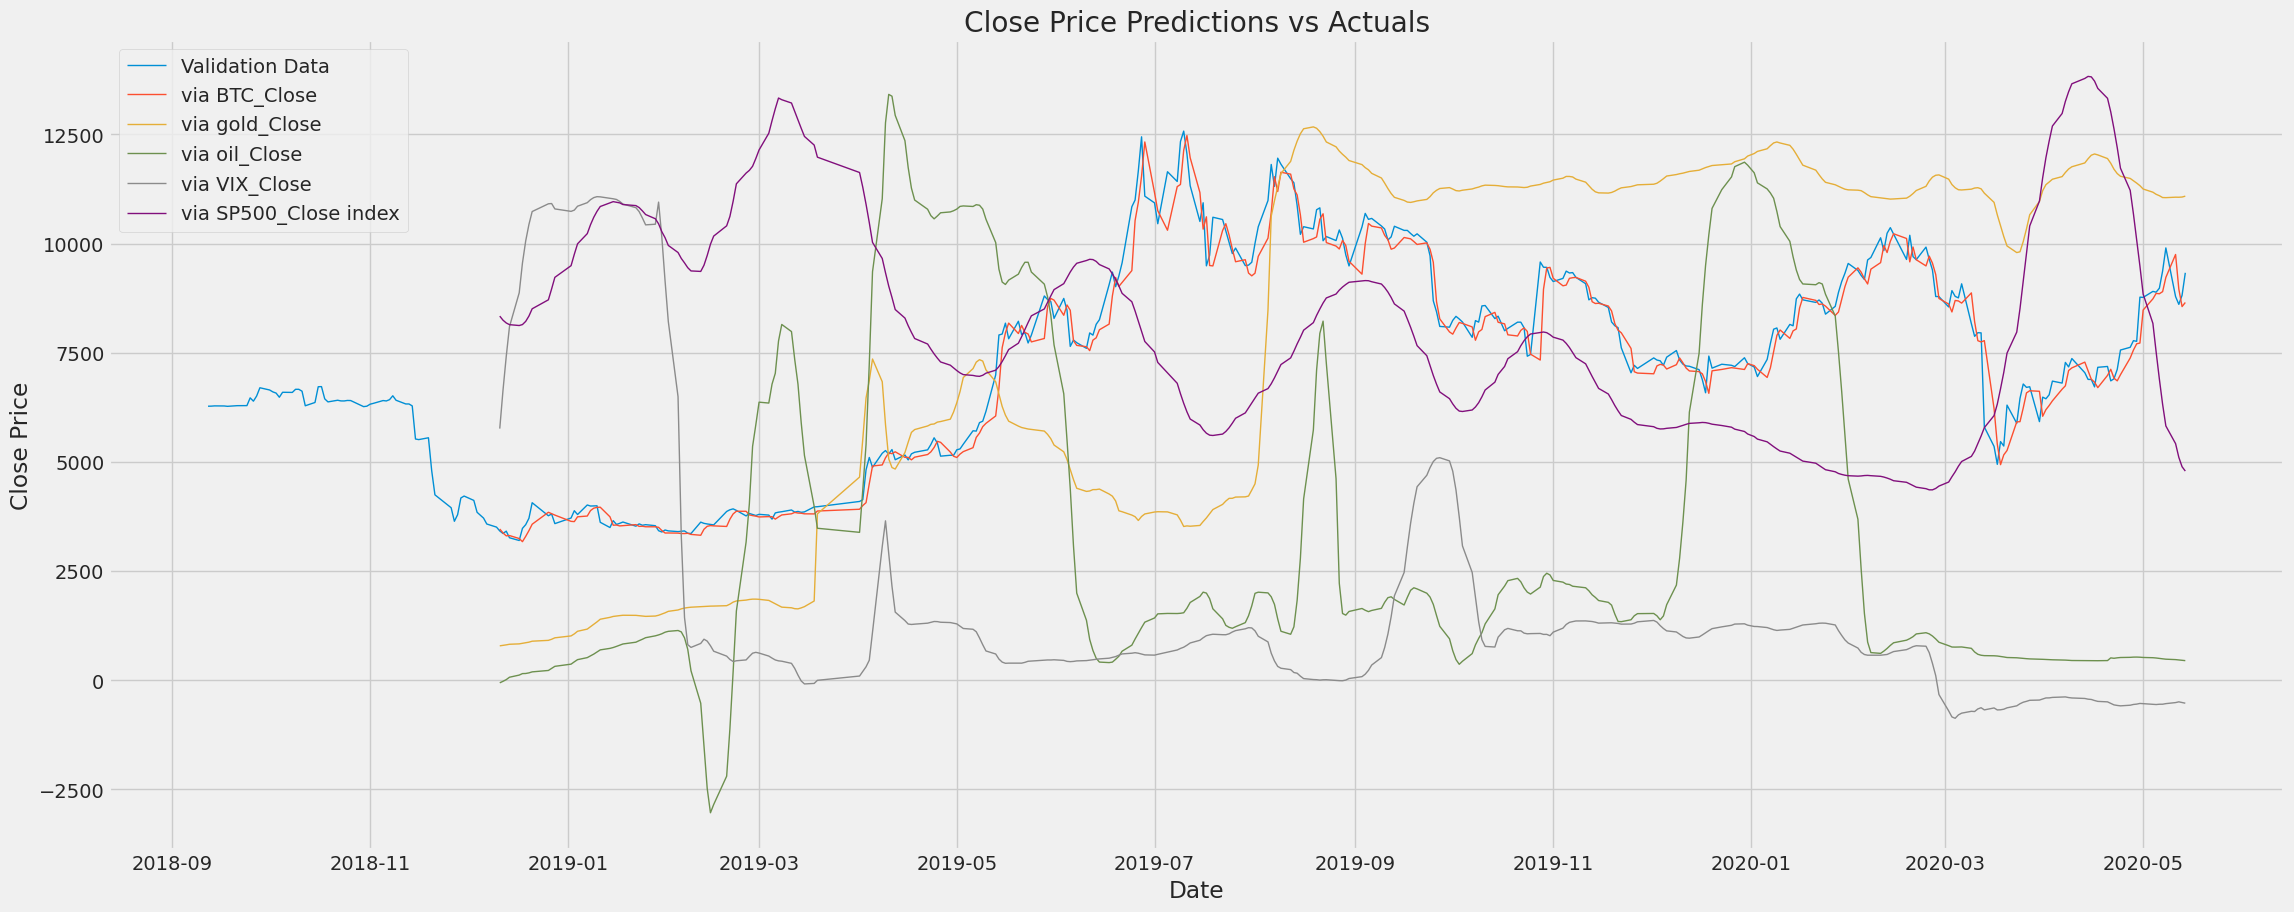

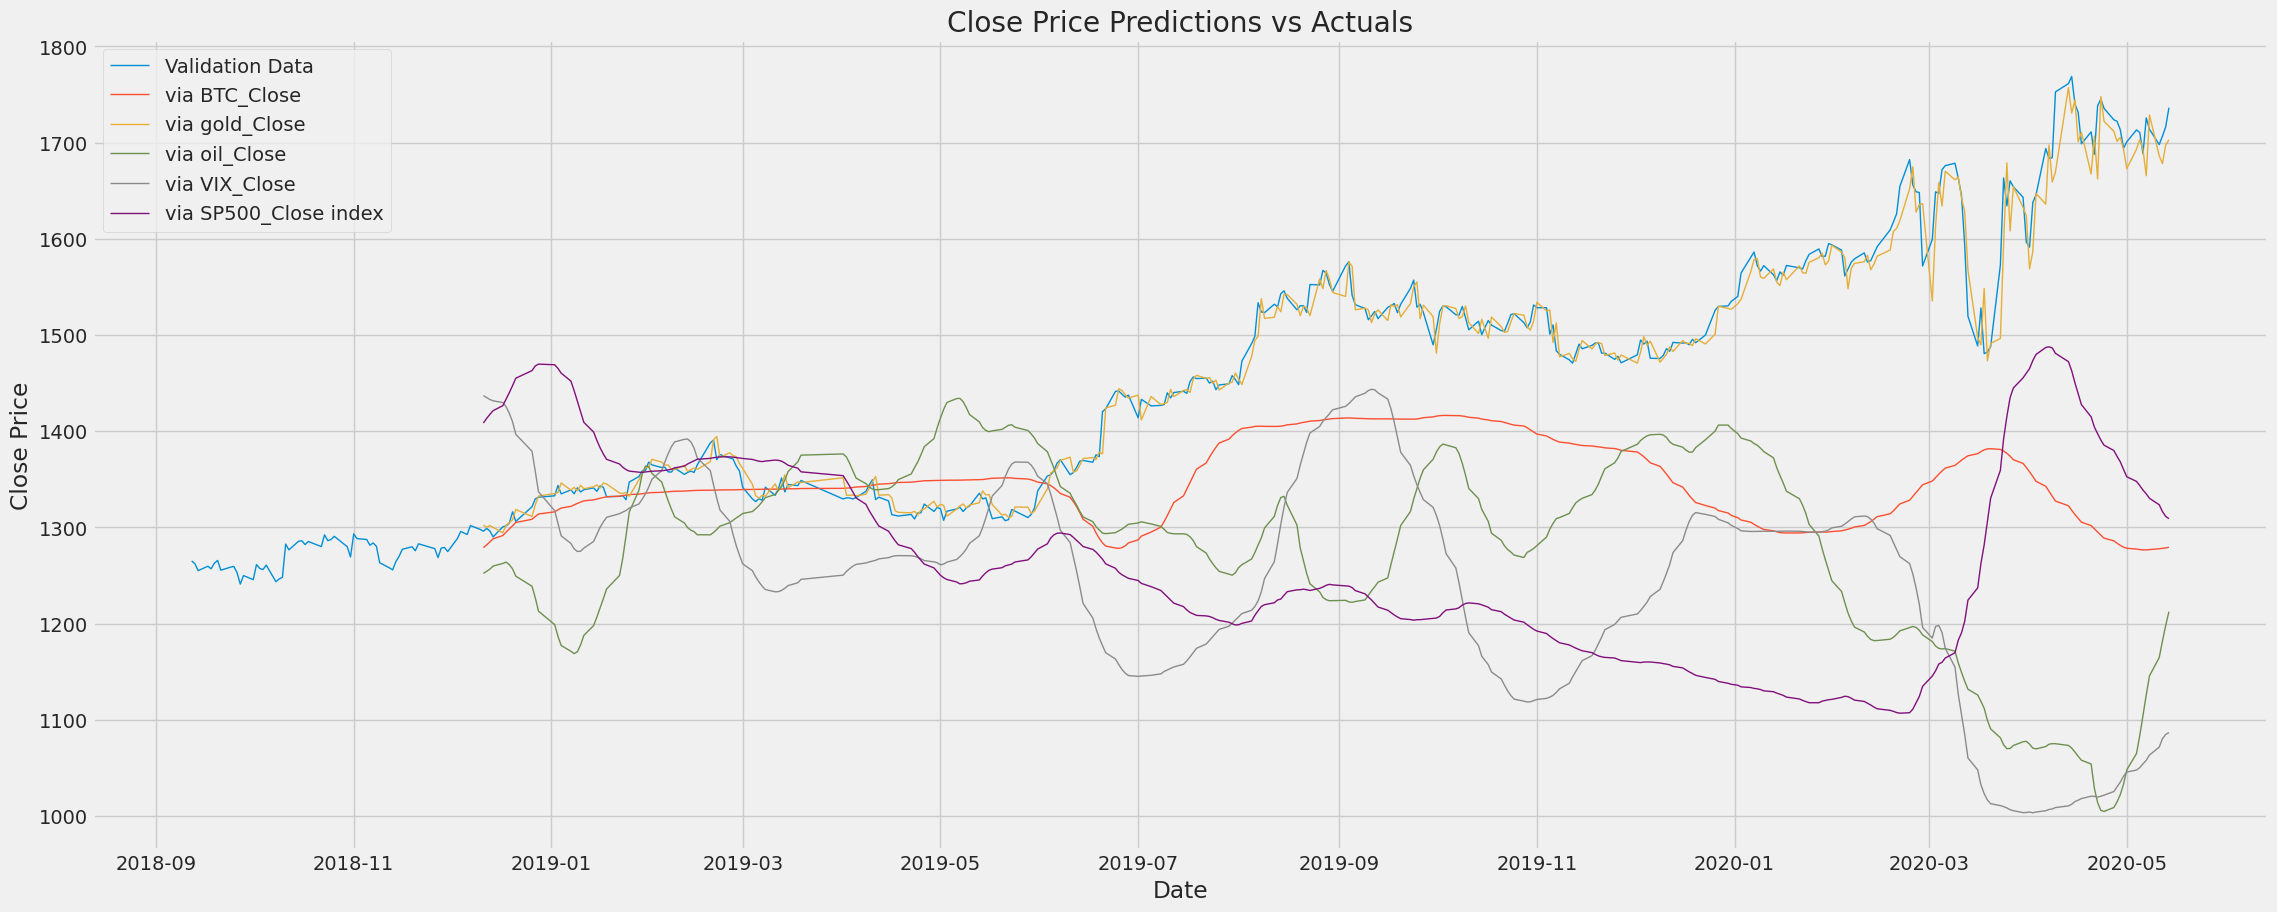

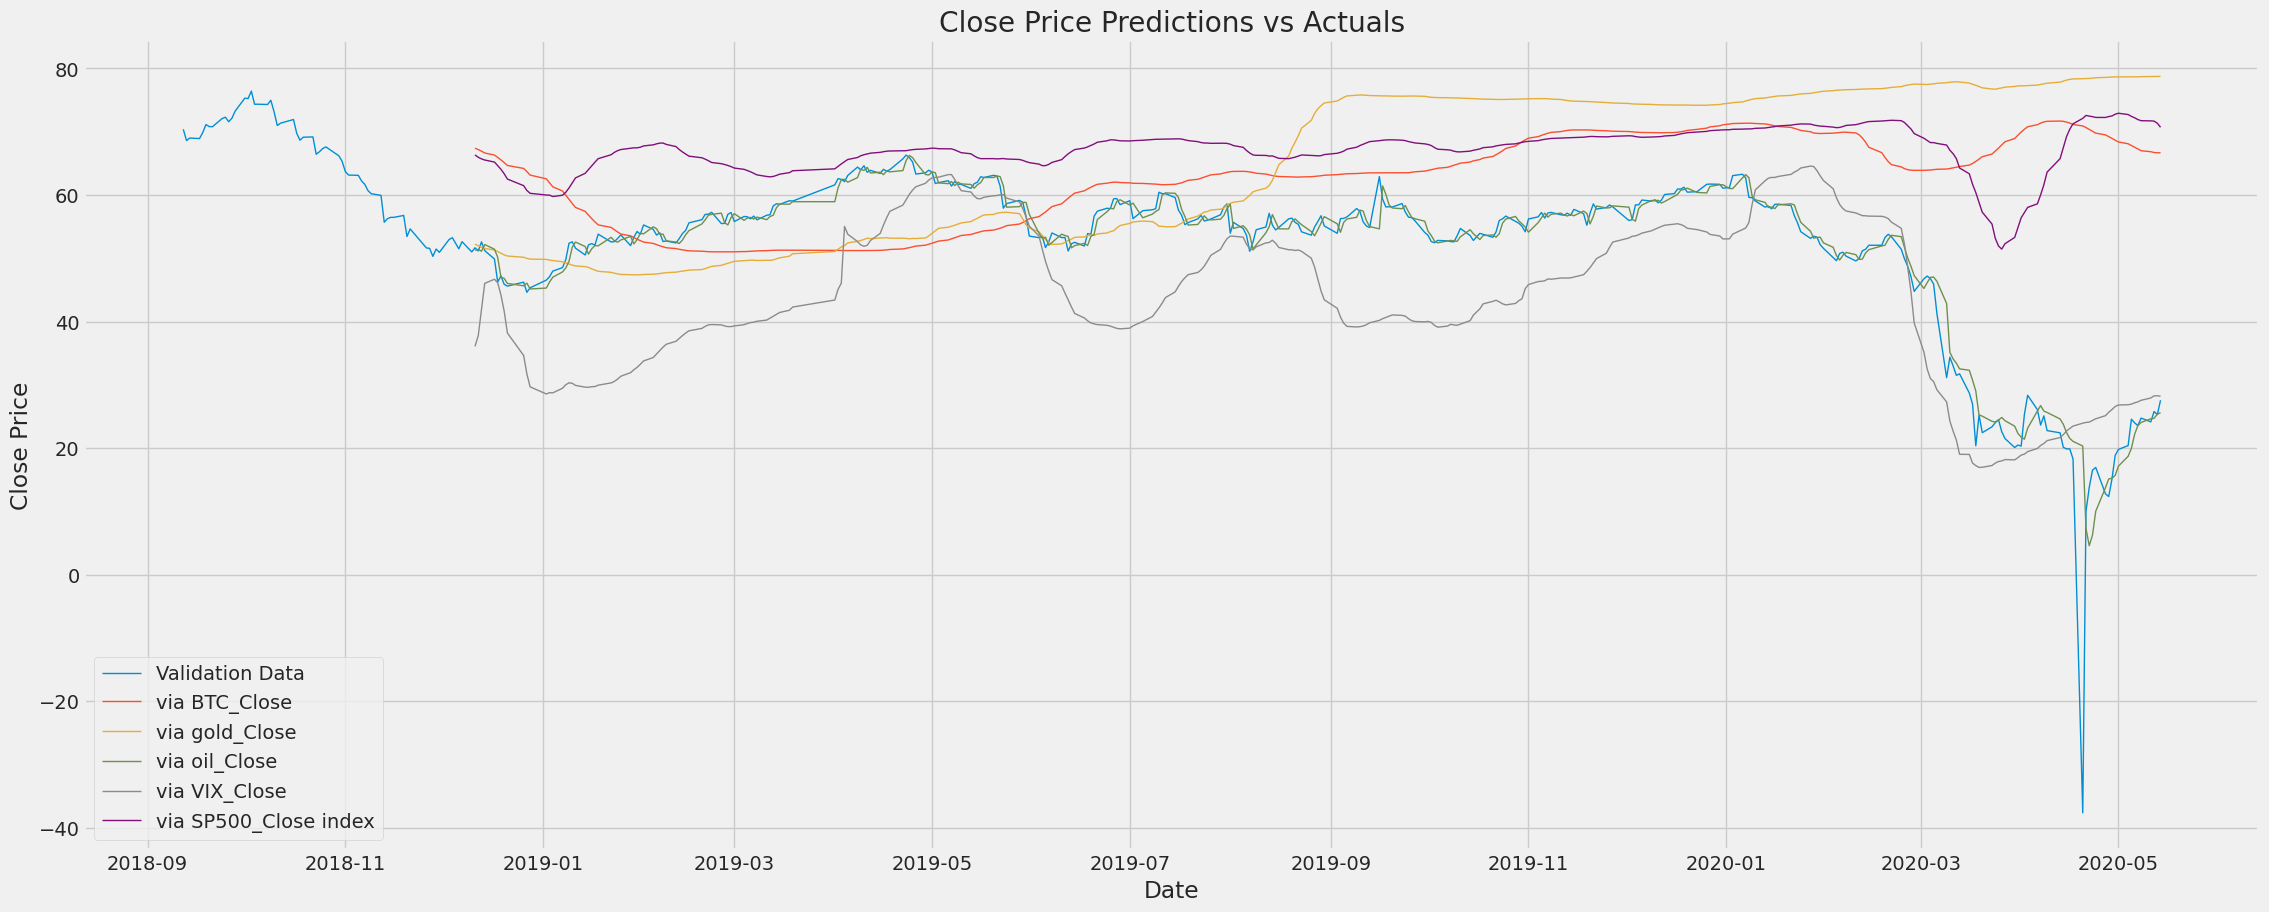

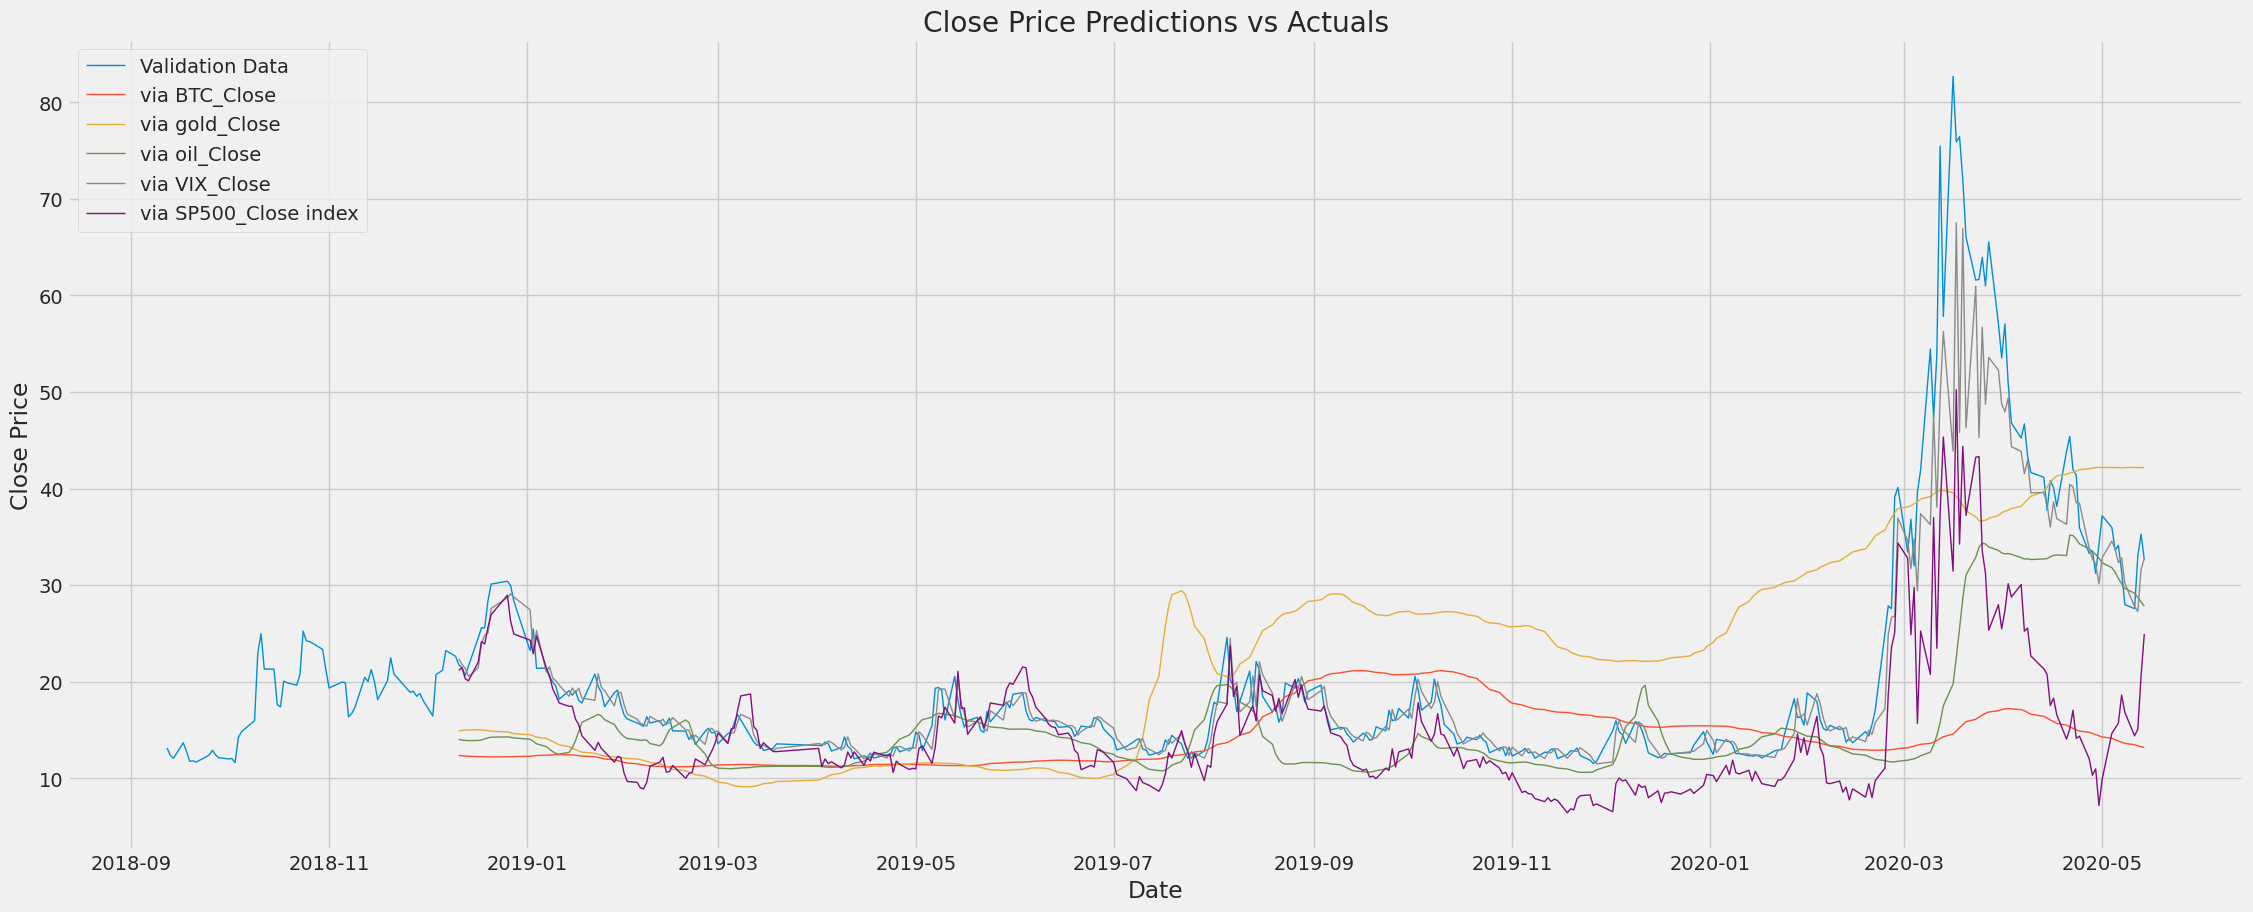

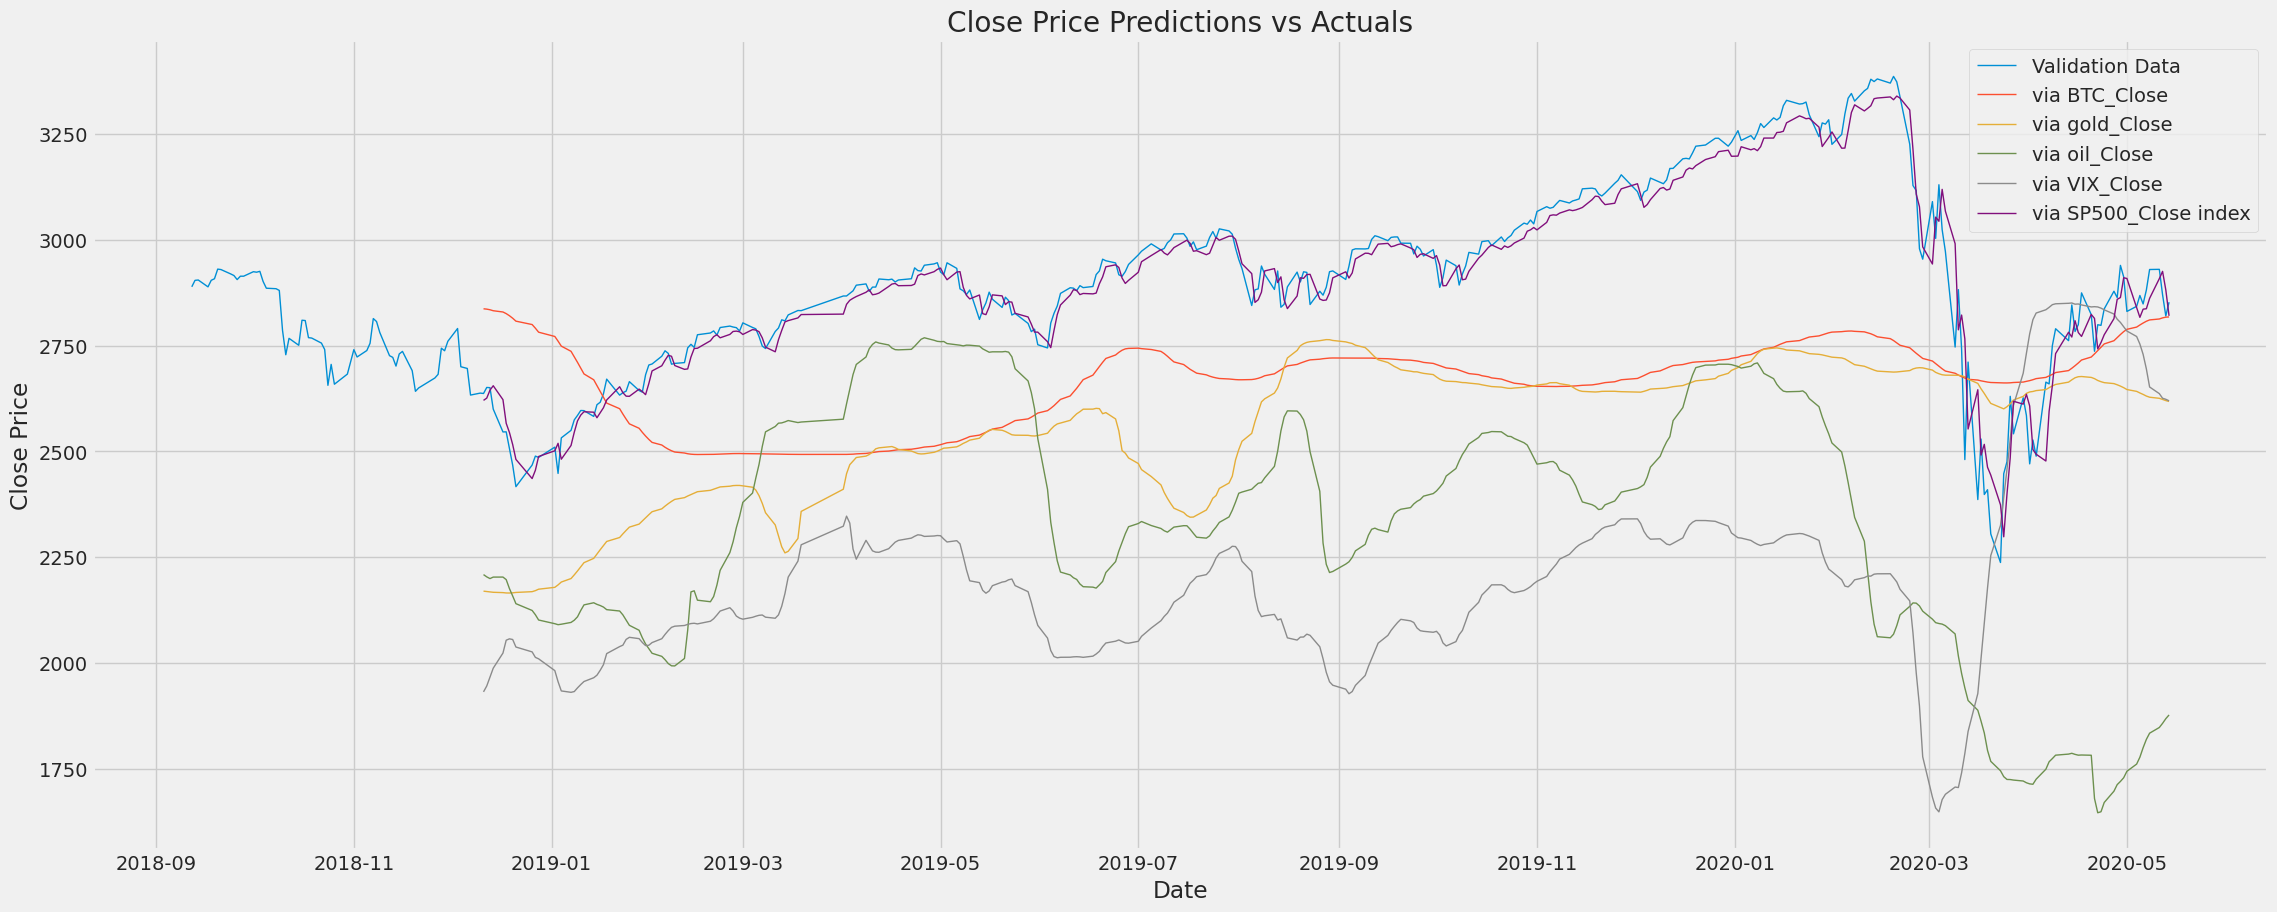

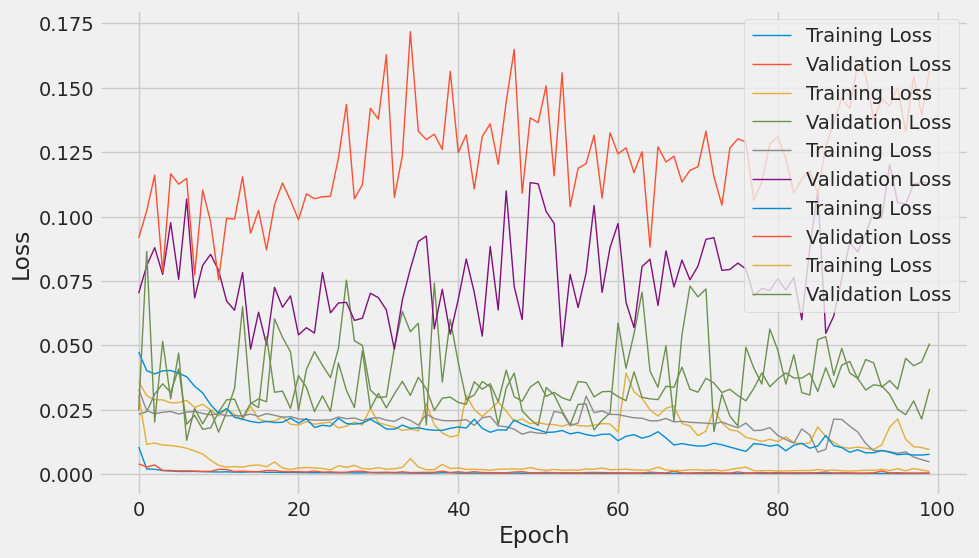

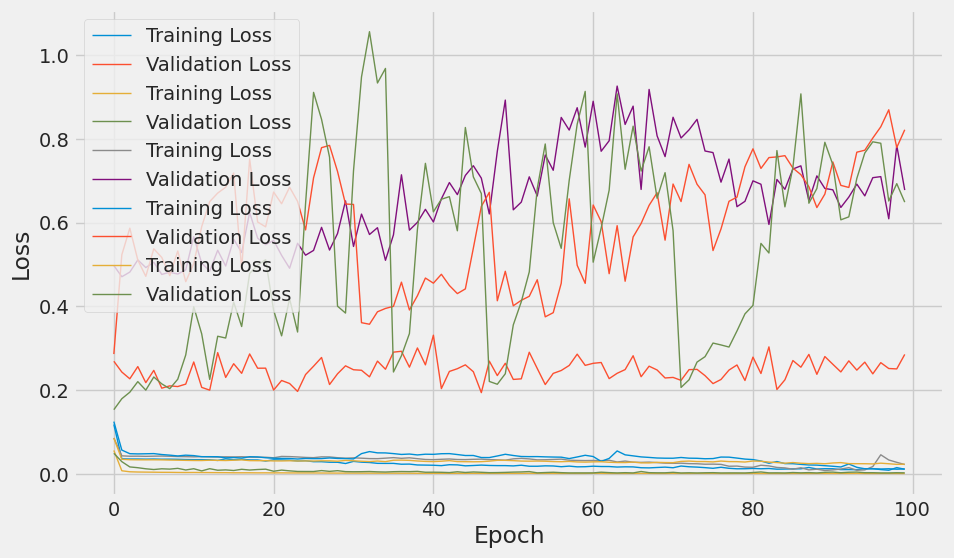

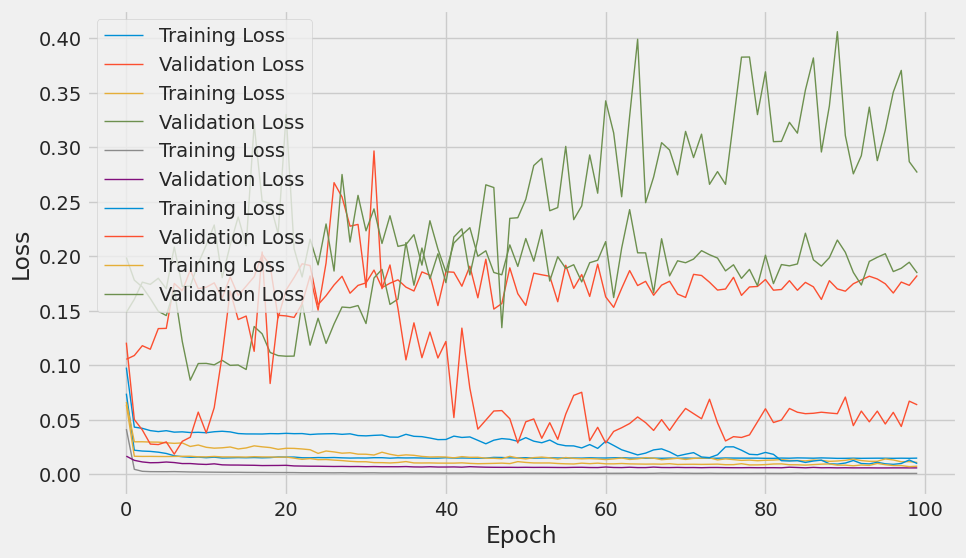

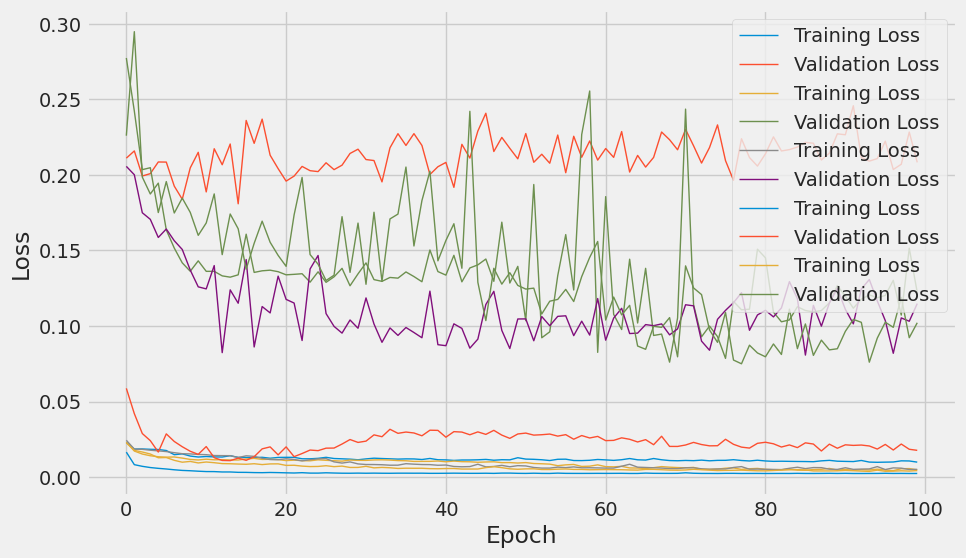

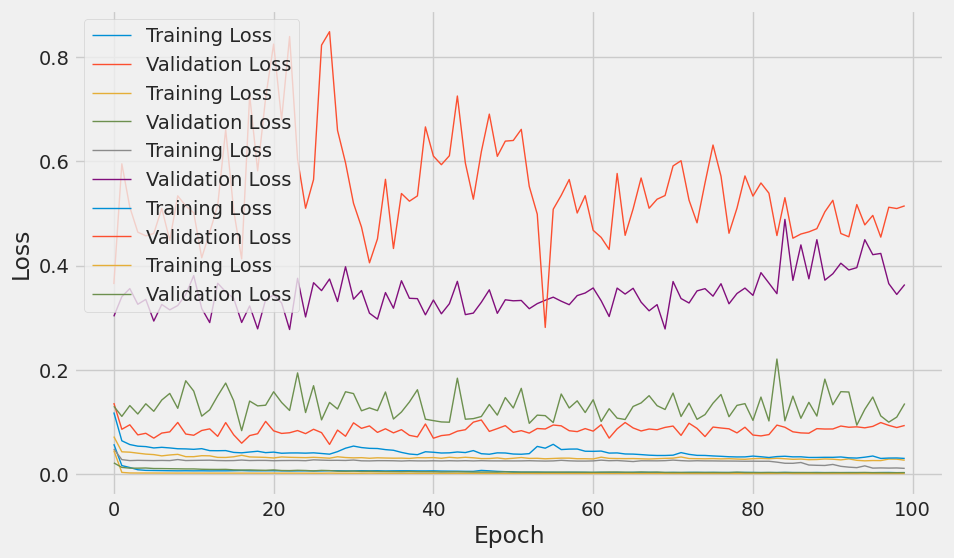

{'BTC_Close': {'BTC_Close': 408.20209719432773, 'gold_Close': 3419.624890827453, 'oil_Close': 6314.312968805226, 'VIX_Close': 7441.267176749828, 'SP500_Close index': 4232.60121489493}, 'gold_Close': {'BTC_Close': 184.8985524464794, 'gold_Close': 17.535446048693366, 'oil_Close': 284.9521029633111, 'VIX_Close': 313.7718665465964, 'SP500_Close index': 278.82363373483923}, 'oil_Close': {'BTC_Close': 20.465845817828235, 'gold_Close': 25.21569414601636, 'oil_Close': 3.622548857582374, 'VIX_Close': 12.088009931445649, 'SP500_Close index': 20.58950243076701}, 'VIX_Close': {'BTC_Close': 14.421402444572104, 'gold_Close': 11.046367435483782, 'oil_Close': 10.7078558088609, 'VIX_Close': 4.20740330683629, 'SP500_Close index': 10.100106558166742}, 'SP500_Close index': {'BTC_Close': 330.2940382433469, 'gold_Close': 398.3994869775774, 'oil_Close': 654.1064809564346, 'VIX_Close': 778.4044230562668, 'SP500_Close index': 49.509255904152596}}


In [14]:
# # target_rmse
# for results in target_result:
#   plt.figure(figsize=(25,10))
#   plt.plot(df_test[[results]], label='Validation Data', linewidth=1)  
#   # plt.plot(y_actual, label='Validation Data', linewidth=1)  
#   for result in target_result[results]:
#     # print(target_result[results])
#     plt.plot(target_result[results][result], label="via " + result, linewidth=1)
#   # Add a legend and axis labels
#   plt.legend()
#   plt.xlabel('Date')
#   plt.ylabel('Close Price')
#   plt.title('Close Price Predictions vs Actuals')
#   plt.show()

# # Plot the training and validation loss over time (To see if there is overfitting)
# for results in target_history:
#   plt.figure(figsize=(10,6))
#   for result in target_result[results]:
#     plt.plot(target_history[results][result].history['loss'], label='Training Loss', linewidth=1)
#     plt.plot(target_history[results][result].history['val_loss'], label='Validation Loss', linewidth=1)
#   plt.xlabel('Epoch')
#   plt.ylabel('Loss')
#   plt.legend()
#   plt.show()
# print(target_rmse)
